In [133]:
import os
import numpy as np
import pandas as pd
#caracterísicas de audio y ML. Spicy & audio
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt


%matplotlib inline

In [134]:
import librosa
import librosa.display
#import IPython
from IPython.display import Audio
from IPython.display import Image
#import matplotlib.pyplot as plt

In [135]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
def standardize(x): 
    return (x-mean_px)/std_px

In [9]:
#extract_features

In [136]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel, tonnetz, contrast, tempo):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        #sample_rate, audio = wavfile.read(audioPath)
        if tonnetz:
            stft=np.abs(librosa.stft(X)) #short time fournier transform
            result=np.array([])
        if mfcc:
            mfccs=librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
            mfccs_std=np.std(mfccs.T, axis=0)
            mfccs_mean=np.mean(mfccs.T, axis=0)
            result=np.hstack((result, mfccs_mean))
            result=np.hstack((result, mfccs_std))
        if chroma:
            chroma=librosa.feature.chroma_stft(S=stft, sr=sample_rate)
            chroma_mean = np.mean(chroma.T,axis=0)
            chroma_std=np.std(chroma.T,axis=0)
            result=np.hstack((result, chroma_mean))
            result=np.hstack((result, chroma_std))
        if tonnetz:
            y = librosa.effects.harmonic(X)
            tonnetz = librosa.feature.tonnetz(y=y, sr=sample_rate)
            tonnetz_mean = np.mean(tonnetz.T,axis=0)
            tonnetz_std = np.std(tonnetz.T,axis=0)
            result=np.hstack((result, tonnetz_mean))
            result=np.hstack((result, tonnetz_std))
        if contrast:
            contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
            contrast_mean = np.mean(contrast.T,axis=0)
            contrast_std = np.std(contrast.T,axis=0)
            result=np.hstack((result, contrast_mean))
            result=np.hstack((result, contrast_std))
        if tempo:
            tempo=librosa.feature.tempogram(X, sr=sample_rate)
            tempo_mean=np.mean(tempo.T,axis=0)
            tempo_std=np.std(tempo.T,axis=0)
            result=np.hstack((result, tempo_mean))
            result=np.hstack((result, tempo_std))
        return result

In [11]:
#386 features. Cada una de ellas se hace la media y la std. So de las 193 q se eligen se van pasando.

In [12]:
#emotions

In [137]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised', 
  '09': 'sample' 
}
#DataFlair - Emotions to observe TODO
observed_emotions=['neutral', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
#observed_emotions=['sample', 'surprised']
#observed_emotions=['happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

In [14]:
#load_data and save them in .csv

In [139]:
df = pd.DataFrame(columns=['feature'])
def load_data_save(test_size=0.25): #parámetro de entrada: tamaño relativo del conjunto de pruebas.
    x,y=[],[]
    bookmark=0
    for file in glob.glob("C:\\audio_emotions_ddbb\\Emotions\\*\\*.wav"):
        #file_name=os.path.basename(file)
        emotion_path = os.path.dirname(file)
        emotion_code = emotion_path[32:34]
        emotion=emotions[emotion_code]
        print(file)
        
        if emotion not in observed_emotions:
            continue
        
        #!!!!cuidado controlar estado. read about it caracteristicas sonido emocion:
        feature=extract_feature(file, mfcc=True, chroma=False, mel=False, tonnetz=True, contrast=True, tempo=True)
        
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1 
        
        x.append(feature)
        y.append(emotion)
        
    
    #return train_test_split(np.array(x), y, test_size=test_size, random_state=23) #primer ejemplo básico
    return x,y

In [140]:
x,y=load_data_save()

C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-02.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-03.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-04.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-05.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-06.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-07.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-08.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-09.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-10.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-11.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-12.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-13.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-14.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-15.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-16.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-17.wav
C:\audio_emotions_ddbb\Emotions\01\03-01

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=509
  warnings.warn(
C:\Users\amand\anaconda3\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1001_IEO_NEU_XX.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=401
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1001_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1001_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1001_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1001_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1001_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1001_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1001_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1001_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1001_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1001_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1002_DFA_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1002_IEO_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1002_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1002_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1002_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1002_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1002_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1002_MTI_NEU_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=351
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1008_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1008_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1008_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1008_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1008_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1008_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1008_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1008_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1008_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1009_DFA_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1009_IEO_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1009_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1009_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1009_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1009_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1009_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1009_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1009_TIE_NEU_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=434
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1011_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1011_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1011_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1011_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1011_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1011_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1011_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1011_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1011_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1011_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1012_DFA_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1012_IEO_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1012_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1012_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1012_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1012_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1012_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1012_MTI_NEU_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=476
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1013_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1013_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1013_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1013_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1013_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1013_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1013_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1013_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1013_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1013_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1014_DFA_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1014_IEO_NEU_XX.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=493
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1014_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1014_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1014_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1014_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1014_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1014_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1014_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1014_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1014_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1014_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1015_DFA_NEU_XX.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=443
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1015_IEO_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1015_IOM_NEU_XX.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=501
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1015_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1015_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1015_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1015_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1015_MTI_NEU_XX.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=409
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1015_TAI_NEU_XX.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=393
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1015_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1015_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1015_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1016_DFA_NEU_XX.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=484
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1016_IEO_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1016_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1016_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1016_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1016_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1016_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1016_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1016_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1016_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1016_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1016_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1017_DFA_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1017_IEO_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1017_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1017_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1017_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1017_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1017_IWW_NEU_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=418
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1017_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1018_DFA_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1018_IEO_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1018_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1018_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1018_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1018_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1018_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1018_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1018_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1018_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1018_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1018_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1019_DFA_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1019_IEO_NEU_XX.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=451
  warnings.warn(
C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=468
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1019_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1019_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1019_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1019_IWW_NEU_XX.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=459
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1019_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1019_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1019_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1019_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1019_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1020_DFA_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1020_IEO_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1020_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1020_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1020_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1020_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1020_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1020_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1020_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1020_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1020_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1020_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1021_DFA_NEU_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=426
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1022_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1022_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1022_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1022_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1022_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1022_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1022_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1022_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1022_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1022_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1023_DFA_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1023_IEO_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1023_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1023_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1023_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1023_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1023_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1023_MTI_NEU_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=368
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1056_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1056_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1056_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1057_DFA_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1057_IEO_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1057_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1057_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1057_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1057_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1057_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1057_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1057_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1057_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1057_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1057_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1058_DFA_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1058_IEO_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1058_IOM_NEU_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=334
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\1085_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1085_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1085_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1085_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1085_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1085_TIE_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1085_TSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1085_WSI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1086_DFA_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1086_IEO_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1086_IOM_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1086_ITH_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1086_ITS_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1086_IWL_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1086_IWW_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1086_MTI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1086_TAI_NEU_XX.wav
C:\audio_emotions_ddbb\Emotions\01\1086_TIE_NEU_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=716
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\a04.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=939
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\a05.wav
C:\audio_emotions_ddbb\Emotions\01\a06.wav
C:\audio_emotions_ddbb\Emotions\01\a07.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=925
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\a08.wav
C:\audio_emotions_ddbb\Emotions\01\a09.wav
C:\audio_emotions_ddbb\Emotions\01\a10.wav
C:\audio_emotions_ddbb\Emotions\01\a11.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=916
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\a12.wav
C:\audio_emotions_ddbb\Emotions\01\a13.wav
C:\audio_emotions_ddbb\Emotions\01\a14.wav
C:\audio_emotions_ddbb\Emotions\01\a15.wav
C:\audio_emotions_ddbb\Emotions\01\d01.wav
C:\audio_emotions_ddbb\Emotions\01\d02.wav
C:\audio_emotions_ddbb\Emotions\01\d03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=809
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\d04.wav
C:\audio_emotions_ddbb\Emotions\01\d05.wav
C:\audio_emotions_ddbb\Emotions\01\d06.wav
C:\audio_emotions_ddbb\Emotions\01\d07.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=930
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\d08.wav
C:\audio_emotions_ddbb\Emotions\01\d09.wav
C:\audio_emotions_ddbb\Emotions\01\d10.wav
C:\audio_emotions_ddbb\Emotions\01\d11.wav
C:\audio_emotions_ddbb\Emotions\01\d12.wav
C:\audio_emotions_ddbb\Emotions\01\d13.wav
C:\audio_emotions_ddbb\Emotions\01\d14.wav
C:\audio_emotions_ddbb\Emotions\01\d15.wav
C:\audio_emotions_ddbb\Emotions\01\f01.wav
C:\audio_emotions_ddbb\Emotions\01\f02.wav
C:\audio_emotions_ddbb\Emotions\01\f03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=788
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\f04.wav
C:\audio_emotions_ddbb\Emotions\01\f05.wav
C:\audio_emotions_ddbb\Emotions\01\f06.wav
C:\audio_emotions_ddbb\Emotions\01\f07.wav
C:\audio_emotions_ddbb\Emotions\01\f08.wav
C:\audio_emotions_ddbb\Emotions\01\f09.wav
C:\audio_emotions_ddbb\Emotions\01\f10.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=921
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\f11.wav
C:\audio_emotions_ddbb\Emotions\01\f12.wav
C:\audio_emotions_ddbb\Emotions\01\f13.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=849
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\f14.wav
C:\audio_emotions_ddbb\Emotions\01\f15.wav
C:\audio_emotions_ddbb\Emotions\01\h01.wav
C:\audio_emotions_ddbb\Emotions\01\h02.wav
C:\audio_emotions_ddbb\Emotions\01\h03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=781
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\h04.wav
C:\audio_emotions_ddbb\Emotions\01\h05.wav
C:\audio_emotions_ddbb\Emotions\01\h06.wav
C:\audio_emotions_ddbb\Emotions\01\h07.wav
C:\audio_emotions_ddbb\Emotions\01\h08.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=867
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\h09.wav
C:\audio_emotions_ddbb\Emotions\01\h10.wav
C:\audio_emotions_ddbb\Emotions\01\h11.wav
C:\audio_emotions_ddbb\Emotions\01\h12.wav
C:\audio_emotions_ddbb\Emotions\01\h13.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=954
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\h14.wav
C:\audio_emotions_ddbb\Emotions\01\h15.wav
C:\audio_emotions_ddbb\Emotions\01\n01.wav
C:\audio_emotions_ddbb\Emotions\01\n02.wav
C:\audio_emotions_ddbb\Emotions\01\n03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=708
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\n04.wav
C:\audio_emotions_ddbb\Emotions\01\n05.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=976
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\n06.wav
C:\audio_emotions_ddbb\Emotions\01\n07.wav
C:\audio_emotions_ddbb\Emotions\01\n08.wav
C:\audio_emotions_ddbb\Emotions\01\n09.wav
C:\audio_emotions_ddbb\Emotions\01\n10.wav
C:\audio_emotions_ddbb\Emotions\01\n11.wav
C:\audio_emotions_ddbb\Emotions\01\n12.wav
C:\audio_emotions_ddbb\Emotions\01\n13.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=961
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\n14.wav
C:\audio_emotions_ddbb\Emotions\01\n15.wav
C:\audio_emotions_ddbb\Emotions\01\n16.wav
C:\audio_emotions_ddbb\Emotions\01\n17.wav
C:\audio_emotions_ddbb\Emotions\01\n18.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=651
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\n19.wav
C:\audio_emotions_ddbb\Emotions\01\n20.wav
C:\audio_emotions_ddbb\Emotions\01\n21.wav
C:\audio_emotions_ddbb\Emotions\01\n22.wav
C:\audio_emotions_ddbb\Emotions\01\n23.wav
C:\audio_emotions_ddbb\Emotions\01\n24.wav
C:\audio_emotions_ddbb\Emotions\01\n25.wav
C:\audio_emotions_ddbb\Emotions\01\n26.wav
C:\audio_emotions_ddbb\Emotions\01\n27.wav
C:\audio_emotions_ddbb\Emotions\01\n28.wav
C:\audio_emotions_ddbb\Emotions\01\n29.wav
C:\audio_emotions_ddbb\Emotions\01\n30.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_back_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=780
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_bar_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=764
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_base_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=821
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_bath_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=826
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_bean_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=793
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_beg_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=753
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_boat_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=740
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_bone_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=773
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_book_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=662
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_bought_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=745
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_burn_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=813
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_cab_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=728
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_calm_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=706
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_came_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=803
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_cause_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=770
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_chain_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=808
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_chair_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=888
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_chalk_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=785
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_chat_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=723
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_check_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=701
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_cheek_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=767
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_chief_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=777
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_choice_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=789
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_cool_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=756
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_dab_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=759
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_date_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=741
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_dead_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=755
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_death_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_deep_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_dime_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=783
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_dip_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=660
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_ditch_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=757
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_dodge_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=806
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_dog_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=774
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_doll_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=852
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_door_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=711
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_fail_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_fall_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=782
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_far_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_fat_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=748
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_fit_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_five_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=739
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_food_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=733
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_gap_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=751
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_gas_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=795
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_gaze_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=845
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_germ_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=800
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_get_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=724
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_gin_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=797
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_goal_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=743
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_good_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_goose_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=858
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_gun_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=752
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_half_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=714
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_hall_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=742
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_hash_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=824
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_hate_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=682
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_have_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=732
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_haze_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=766
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_hire_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_hit_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=707
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_hole_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=719
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_home_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=771
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_hurl_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=754
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_hush_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=799
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_jail_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=828
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_jar_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_join_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=855
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_judge_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_jug_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_juice_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=819
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_keen_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_keep_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=737
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_keg_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=713
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_kick_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=762
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_kill_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=791
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_king_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=811
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_kite_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=734
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_knock_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_late_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=772
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_laud_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_lean_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_learn_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_lease_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_lid_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_life_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_limb_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_live_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=768
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_loaf_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=839
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_long_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_lore_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=726
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_lose_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_lot_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=769
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_love_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=738
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_luck_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=765
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_make_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_match_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=794
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_merge_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=786
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_mess_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_met_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=763
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_mill_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_mob_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_mode_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_mood_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_moon_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_mop_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=687
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_mouse_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=804
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_nag_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=818
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_name_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_near_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_neat_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=746
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_nice_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=790
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_note_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_numb_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_pad_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=720
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_page_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_pain_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_pass_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=846
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_pearl_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_peg_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_perch_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_phone_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=820
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_pick_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_pike_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=721
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_pole_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=718
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_pool_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_puff_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=784
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_rag_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=881
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_raid_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_rain_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_raise_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_rat_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_reach_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=836
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_read_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_red_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_ring_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=838
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_ripe_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_road_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=798
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_room_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_rose_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=792
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_rot_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=805
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_rough_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_rush_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_said_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_sail_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_search_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=873
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_seize_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=815
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_sell_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=856
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_shack_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_shall_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_shawl_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_sheep_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_shirt_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_should_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_shout_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_size_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=854
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_soap_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_soup_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_sour_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=802
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_south_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=882
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_sub_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_such_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=778
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_sure_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=736
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_take_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=827
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_talk_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_tape_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=668
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_team_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=822
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_tell_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_thin_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_third_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_thought_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=696
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_thumb_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_time_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_tip_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_tire_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=761
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_ton_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=722
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_tool_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_tough_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=729
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_turn_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_vine_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_voice_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=807
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_void_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=830
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_vote_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=658
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_wag_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_walk_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_wash_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_week_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=833
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_wheat_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_when_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=823
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_which_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_whip_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=691
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_white_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_wife_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_wire_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=817
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OAF_witch_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_yearn_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_yes_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_young_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\OAF_youth_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=825
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\OA_bite_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\sa01.wav
C:\audio_emotions_ddbb\Emotions\01\sa02.wav
C:\audio_emotions_ddbb\Emotions\01\sa03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=835
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\sa04.wav
C:\audio_emotions_ddbb\Emotions\01\sa05.wav
C:\audio_emotions_ddbb\Emotions\01\sa06.wav
C:\audio_emotions_ddbb\Emotions\01\sa07.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1004
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\sa08.wav
C:\audio_emotions_ddbb\Emotions\01\sa09.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=947
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\sa10.wav
C:\audio_emotions_ddbb\Emotions\01\sa11.wav
C:\audio_emotions_ddbb\Emotions\01\sa12.wav
C:\audio_emotions_ddbb\Emotions\01\sa13.wav
C:\audio_emotions_ddbb\Emotions\01\sa14.wav
C:\audio_emotions_ddbb\Emotions\01\sa15.wav
C:\audio_emotions_ddbb\Emotions\01\su01.wav
C:\audio_emotions_ddbb\Emotions\01\su02.wav
C:\audio_emotions_ddbb\Emotions\01\su03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=643
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\su04.wav
C:\audio_emotions_ddbb\Emotions\01\su05.wav
C:\audio_emotions_ddbb\Emotions\01\su06.wav
C:\audio_emotions_ddbb\Emotions\01\su07.wav
C:\audio_emotions_ddbb\Emotions\01\su08.wav
C:\audio_emotions_ddbb\Emotions\01\su09.wav
C:\audio_emotions_ddbb\Emotions\01\su10.wav
C:\audio_emotions_ddbb\Emotions\01\su11.wav
C:\audio_emotions_ddbb\Emotions\01\su12.wav
C:\audio_emotions_ddbb\Emotions\01\su13.wav
C:\audio_emotions_ddbb\Emotions\01\su14.wav
C:\audio_emotions_ddbb\Emotions\01\su15.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_back_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=801
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_bar_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_base_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_bath_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=758
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_bean_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_beg_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_bite_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=779
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_boat_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_bone_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_book_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_bought_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_burn_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_cab_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_calm_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_came_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=903
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_cause_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=874
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_chain_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=831
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_chair_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_chalk_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_chat_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=840
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_check_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=860
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_cheek_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=866
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_chief_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_choice_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_cool_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_dab_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_date_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_dead_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_death_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=744
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_deep_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=681
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_dime_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_dip_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_ditch_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_dodge_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_dog_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=841
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_doll_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_door_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_fail_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_fall_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_far_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_fat_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_fit_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_five_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_food_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_gap_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_gas_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_gaze_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=868
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_germ_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_get_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_gin_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_goal_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_good_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=787
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_goose_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_gun_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_half_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_hall_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_hash_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_hate_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_have_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_haze_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=876
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_hire_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_hit_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=796
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_hole_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_home_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_hurl_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_hush_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=859
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_jail_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_jar_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_join_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_judge_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_jug_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_juice_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=877
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_keen_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_keep_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_keg_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_kick_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=776
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_kill_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_king_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_kite_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=775
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_knock_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_late_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_laud_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_lean_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_learn_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_lease_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_lid_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_life_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_limb_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_live_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_loaf_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=857
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_long_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_lore_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_lose_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_lot_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_love_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_luck_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_make_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_match_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_merge_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_mess_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_met_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_mill_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_mob_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_mode_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_mood_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_moon_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_mop_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_mouse_neutr

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=842
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_neat_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_nice_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=885
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_note_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=829
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_numb_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_pad_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=844
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_page_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_pain_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_pass_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=863
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_pearl_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_peg_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_perch_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=843
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_phone_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_pick_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_pike_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_pole_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_pool_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=717
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_puff_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_rag_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_raid_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_rain_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=861
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_raise_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_rat_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=812
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_reach_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_read_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=810
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_red_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_ring_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_ripe_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=725
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_road_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_room_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_rose_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_rot_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_rough_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=747
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_rush_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_said_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_sail_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_search_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_seize_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=864
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_sell_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_shack_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=832
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_shall_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_shawl_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=870
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_sheep_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_shirt_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_should_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_shout_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=730
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_size_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_soap_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_soup_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_sour_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_south_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_sub_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_such_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_sure_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_take_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_talk_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_tape_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_team_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_tell_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_thin_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_third_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=710
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_thought_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=834
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_thumb_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_time_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_tip_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_tire_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_ton_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_tool_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_tough_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_turn_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_vine_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_voice_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=886
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_void_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_vote_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_wag_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_walk_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_wash_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_week_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_wheat_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_when_neutral.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=851
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\01\YAF_which_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_whip_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_white_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_wife_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_wire_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_witch_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_yearn_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_yes_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_young_neutral.wav
C:\audio_emotions_ddbb\Emotions\01\YAF_youth_neutral.wav
C:\audio_emotions_ddbb\Emotions\03\03-01-03-01-01-01-01.wav
C:\audio_emotions_ddbb\Emotions\03\03-01-03-01-01-01-02.wav
C:\audio_emotions_ddbb\Emotions\03\03-01-03-01-01-01-03.wav
C:\audio_emotions_ddbb\Emotions\03\03-01-03-01-01-01-04.wav
C:\audio_emotions_ddbb\Emotions\03\03-01-03-01-01-01-05.wav
C:\audio_emotions_ddbb\Emotions\03\03-01-03-01-01-01-06.wav
C:\audio_emotions_ddbb\Emotions\03\03-01-03-01-01-01-07.wav
C:\audio_emotio

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=376
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\1013_IEO_HAP_LO.wav
C:\audio_emotions_ddbb\Emotions\03\1013_IEO_HAP_MD.wav
C:\audio_emotions_ddbb\Emotions\03\1013_IOM_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1013_ITH_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1013_ITS_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1013_IWL_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1013_IWW_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1013_MTI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1013_TAI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1013_TIE_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1013_TSI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1013_WSI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1014_DFA_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1014_IEO_HAP_HI.wav
C:\audio_emotions_ddbb\Emotions\03\1014_IEO_HAP_LO.wav
C:\audio_emotions_ddbb\Emotions\03\1014_IEO_HAP_MD.wav
C:\audio_emotions_ddbb\Emotions\03\1014_IOM_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1014_ITH_HAP_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=384
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\1015_IEO_HAP_MD.wav
C:\audio_emotions_ddbb\Emotions\03\1015_IOM_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1015_ITH_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1015_ITS_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1015_IWL_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1015_IWW_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1015_MTI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1015_TAI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1015_TIE_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1015_TSI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1015_WSI_HAP_XX.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=342
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\1016_DFA_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1016_IEO_HAP_HI.wav
C:\audio_emotions_ddbb\Emotions\03\1016_IEO_HAP_LO.wav
C:\audio_emotions_ddbb\Emotions\03\1016_IEO_HAP_MD.wav
C:\audio_emotions_ddbb\Emotions\03\1016_IOM_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1016_ITH_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1016_ITS_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1016_IWL_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1016_IWW_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1016_MTI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1016_TAI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1016_TIE_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1016_TSI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1016_WSI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1017_DFA_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1017_IEO_HAP_HI.wav
C:\audio_emotions_ddbb\Emotions\03\1017_IEO_HAP_LO.wav
C:\audio_emotions_ddbb\Emotions\03\1017_IEO_HAP_MD.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=343
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\1063_IEO_HAP_LO.wav
C:\audio_emotions_ddbb\Emotions\03\1063_IEO_HAP_MD.wav
C:\audio_emotions_ddbb\Emotions\03\1063_IOM_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1063_ITH_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1063_ITS_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1063_IWL_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1063_IWW_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1063_MTI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1063_TAI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1063_TIE_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1063_TSI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1063_WSI_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1064_DFA_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1064_IEO_HAP_HI.wav
C:\audio_emotions_ddbb\Emotions\03\1064_IEO_HAP_LO.wav
C:\audio_emotions_ddbb\Emotions\03\1064_IEO_HAP_MD.wav
C:\audio_emotions_ddbb\Emotions\03\1064_IOM_HAP_XX.wav
C:\audio_emotions_ddbb\Emotions\03\1064_ITH_HAP_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=996
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\a12.wav
C:\audio_emotions_ddbb\Emotions\03\a13.wav
C:\audio_emotions_ddbb\Emotions\03\a14.wav
C:\audio_emotions_ddbb\Emotions\03\a15.wav
C:\audio_emotions_ddbb\Emotions\03\d01.wav
C:\audio_emotions_ddbb\Emotions\03\d02.wav
C:\audio_emotions_ddbb\Emotions\03\d03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=896
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\d04.wav
C:\audio_emotions_ddbb\Emotions\03\d05.wav
C:\audio_emotions_ddbb\Emotions\03\d06.wav
C:\audio_emotions_ddbb\Emotions\03\d07.wav
C:\audio_emotions_ddbb\Emotions\03\d08.wav
C:\audio_emotions_ddbb\Emotions\03\d09.wav
C:\audio_emotions_ddbb\Emotions\03\d10.wav
C:\audio_emotions_ddbb\Emotions\03\d11.wav
C:\audio_emotions_ddbb\Emotions\03\d12.wav
C:\audio_emotions_ddbb\Emotions\03\d13.wav
C:\audio_emotions_ddbb\Emotions\03\d14.wav
C:\audio_emotions_ddbb\Emotions\03\d15.wav
C:\audio_emotions_ddbb\Emotions\03\f01.wav
C:\audio_emotions_ddbb\Emotions\03\f02.wav
C:\audio_emotions_ddbb\Emotions\03\f03.wav
C:\audio_emotions_ddbb\Emotions\03\f04.wav
C:\audio_emotions_ddbb\Emotions\03\f05.wav
C:\audio_emotions_ddbb\Emotions\03\f06.wav
C:\audio_emotions_ddbb\Emotions\03\f07.wav
C:\audio_emotions_ddbb\Emotions\03\f08.wav
C:\audio_emotions_ddbb\Emotions\03\f09.wav
C:\audio_emotions_ddbb\Emotions\03\f10.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=654
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\f11.wav
C:\audio_emotions_ddbb\Emotions\03\f12.wav
C:\audio_emotions_ddbb\Emotions\03\f13.wav
C:\audio_emotions_ddbb\Emotions\03\f14.wav
C:\audio_emotions_ddbb\Emotions\03\f15.wav
C:\audio_emotions_ddbb\Emotions\03\h01.wav
C:\audio_emotions_ddbb\Emotions\03\h02.wav
C:\audio_emotions_ddbb\Emotions\03\h03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=890
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\h04.wav
C:\audio_emotions_ddbb\Emotions\03\h05.wav
C:\audio_emotions_ddbb\Emotions\03\h06.wav
C:\audio_emotions_ddbb\Emotions\03\h07.wav
C:\audio_emotions_ddbb\Emotions\03\h08.wav
C:\audio_emotions_ddbb\Emotions\03\h09.wav
C:\audio_emotions_ddbb\Emotions\03\h10.wav
C:\audio_emotions_ddbb\Emotions\03\h11.wav
C:\audio_emotions_ddbb\Emotions\03\h12.wav
C:\audio_emotions_ddbb\Emotions\03\h13.wav
C:\audio_emotions_ddbb\Emotions\03\h14.wav
C:\audio_emotions_ddbb\Emotions\03\h15.wav
C:\audio_emotions_ddbb\Emotions\03\n01.wav
C:\audio_emotions_ddbb\Emotions\03\n02.wav
C:\audio_emotions_ddbb\Emotions\03\n03.wav
C:\audio_emotions_ddbb\Emotions\03\n04.wav
C:\audio_emotions_ddbb\Emotions\03\n05.wav
C:\audio_emotions_ddbb\Emotions\03\n06.wav
C:\audio_emotions_ddbb\Emotions\03\n07.wav
C:\audio_emotions_ddbb\Emotions\03\n08.wav
C:\audio_emotions_ddbb\Emotions\03\n09.wav
C:\audio_emotions_ddbb\Emotions\03\n10.wav
C:\audio_emotions_ddbb\Emotions\03\n11.wav
C:\audio_em

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1003
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\n27.wav
C:\audio_emotions_ddbb\Emotions\03\n28.wav
C:\audio_emotions_ddbb\Emotions\03\n29.wav
C:\audio_emotions_ddbb\Emotions\03\n30.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_back_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_bar_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_base_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_bath_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_bean_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=715
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_beg_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_bite_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=665
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_boat_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=623
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_bone_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_book_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_bought_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=685
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_burn_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_cab_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_calm_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_came_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_cause_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_chain_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_chair_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_chalk_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=703
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_chat_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=684
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_check_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_cheek_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_chief_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_choice_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_cool_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_dab_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_date_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_dead_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_death_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_deep_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=712
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_dime_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_dip_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_ditch_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_dodge_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_dog_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_doll_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=750
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_door_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_fail_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_fall_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_far_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_fat_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=695
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_fit_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=709
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_five_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_food_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_gap_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=676
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_gas_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=837
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_gaze_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_germ_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_get_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_gin_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_goal_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_good_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_goose_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=697
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_gun_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_half_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_hall_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_hash_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_hate_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=678
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_have_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_haze_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_hire_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=749
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_hit_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_hole_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_home_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_hurl_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_hush_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_jail_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_jar_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=735
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_join_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_judge_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_jug_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_juice_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_keen_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_keep_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_keg_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_kick_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_kill_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_king_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=727
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_kite_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_knock_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_late_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_laud_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_lean_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_learn_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_lease_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_lid_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_life_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_limb_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_live_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_loaf_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_long_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_lore_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_lose_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_lot_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_love_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_luck_happy.wav
C:\audio_emotions_ddbb\Emot

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=683
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_mode_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_mood_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_moon_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_mop_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_mouse_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_nag_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_name_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_near_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_neat_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_nice_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_note_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_numb_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_pad_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_page_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_pain_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_pass_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_pearl_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_peg_happy.wav
C:\audio_emotions_ddbb\Emotion

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=646
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\OAF_tire_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_ton_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_tool_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_tough_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_turn_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_vine_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_voice_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_void_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_vote_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_wag_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_walk_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_wash_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_week_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_wheat_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_when_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_which_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_whip_happy.wav
C:\audio_emotions_ddbb\Emotions\03\OAF_white_happy.wav
C:\audio_emotions_ddbb\Em

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=911
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\su04.wav
C:\audio_emotions_ddbb\Emotions\03\su05.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1018
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\su06.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=994
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\su07.wav
C:\audio_emotions_ddbb\Emotions\03\su08.wav
C:\audio_emotions_ddbb\Emotions\03\su09.wav
C:\audio_emotions_ddbb\Emotions\03\su10.wav
C:\audio_emotions_ddbb\Emotions\03\su11.wav
C:\audio_emotions_ddbb\Emotions\03\su12.wav
C:\audio_emotions_ddbb\Emotions\03\su13.wav
C:\audio_emotions_ddbb\Emotions\03\su14.wav
C:\audio_emotions_ddbb\Emotions\03\su15.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_back_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_bar_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_base_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_bath_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_bean_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_beg_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_bite_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_boat_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_bone_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_book_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_bought_happy.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=847
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_cause_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_chain_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_chair_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_chalk_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_chat_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_check_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_cheek_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_chief_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_choice_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_cool_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_dab_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=694
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_date_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_dead_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_death_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=690
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_deep_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_dime_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=702
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_dip_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_ditch_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_dodge_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_dog_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_doll_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_door_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=692
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_fail_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_fall_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_far_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_fat_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_fit_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_five_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_food_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_gap_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=670
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_gas_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_gaze_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_germ_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_get_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_gin_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_goal_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_good_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_goose_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_gun_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_half_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=672
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_hall_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_hash_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_hate_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_have_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_haze_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_hire_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=704
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_hit_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_hole_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_home_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=675
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_hurl_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=698
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_hush_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_jail_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_jar_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_join_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_judge_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_jug_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_juice_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_keen_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_keep_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_keg_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_kick_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_kill_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_king_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_kite_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_knock_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_late_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_laud_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_lean_happy.wav
C:\audio_emotions_ddbb\Emoti

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=671
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_life_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_limb_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_live_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_loaf_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_long_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_lore_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_lose_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_lot_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_love_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_luck_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_make_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_match_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_merge_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_mess_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=853
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_met_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=693
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_mill_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=677
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_mob_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_mode_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_mood_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_moon_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_mop_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_mouse_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_nag_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_name_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_near_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_neat_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_nice_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_note_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_numb_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_pad_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_page_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_pain_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_pass_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_pearl_happy.wav
C:\audio_emotions_ddbb\Emotion

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=674
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_puff_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_rag_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=679
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_raid_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_rain_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_raise_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_rat_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_reach_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_read_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=669
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_red_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_ring_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_ripe_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_road_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_room_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_rose_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_rot_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_rough_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_rush_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_said_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_sail_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_search_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_seize_happy.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=848
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_sell_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_shack_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_shall_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_shawl_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_sheep_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_shirt_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_should_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_shout_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_size_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_soap_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_soup_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_sour_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_south_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_sub_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_such_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_sure_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_take_happy.wav
C:\audio_emotions_ddbb\Emotions\03\YAF_talk_happy.wav
C:\audio_emotions_dd

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=699
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\03\YAF_youth_happy.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-01.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-02.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-03.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-04.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-05.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-06.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-07.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-08.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-09.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-10.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-11.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-12.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-13.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-14.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-01-01-01-15.wav
C:\audio_emotions_ddbb\Emotions\04\03-01-04-0

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


C:\audio_emotions_ddbb\Emotions\04\1076_TIE_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1076_TSI_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1076_WSI_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1077_DFA_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1077_IEO_SAD_HI.wav
C:\audio_emotions_ddbb\Emotions\04\1077_IEO_SAD_LO.wav
C:\audio_emotions_ddbb\Emotions\04\1077_IEO_SAD_MD.wav
C:\audio_emotions_ddbb\Emotions\04\1077_IOM_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1077_ITH_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1077_ITS_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1077_IWL_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1077_IWW_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1077_MTI_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1077_TAI_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1077_TIE_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1077_TSI_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1077_WSI_SAD_XX.wav
C:\audio_emotions_ddbb\Emotions\04\1078_DFA_SAD_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=993
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\d08.wav
C:\audio_emotions_ddbb\Emotions\04\d09.wav
C:\audio_emotions_ddbb\Emotions\04\d10.wav
C:\audio_emotions_ddbb\Emotions\04\d11.wav
C:\audio_emotions_ddbb\Emotions\04\d12.wav
C:\audio_emotions_ddbb\Emotions\04\d13.wav
C:\audio_emotions_ddbb\Emotions\04\d14.wav
C:\audio_emotions_ddbb\Emotions\04\d15.wav
C:\audio_emotions_ddbb\Emotions\04\f01.wav
C:\audio_emotions_ddbb\Emotions\04\f02.wav
C:\audio_emotions_ddbb\Emotions\04\f03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1010
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\f04.wav
C:\audio_emotions_ddbb\Emotions\04\f05.wav
C:\audio_emotions_ddbb\Emotions\04\f06.wav
C:\audio_emotions_ddbb\Emotions\04\f07.wav
C:\audio_emotions_ddbb\Emotions\04\f08.wav
C:\audio_emotions_ddbb\Emotions\04\f09.wav
C:\audio_emotions_ddbb\Emotions\04\f10.wav
C:\audio_emotions_ddbb\Emotions\04\f11.wav
C:\audio_emotions_ddbb\Emotions\04\f12.wav
C:\audio_emotions_ddbb\Emotions\04\f13.wav
C:\audio_emotions_ddbb\Emotions\04\f14.wav
C:\audio_emotions_ddbb\Emotions\04\f15.wav
C:\audio_emotions_ddbb\Emotions\04\h01.wav
C:\audio_emotions_ddbb\Emotions\04\h02.wav
C:\audio_emotions_ddbb\Emotions\04\h03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=883
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\h04.wav
C:\audio_emotions_ddbb\Emotions\04\h05.wav
C:\audio_emotions_ddbb\Emotions\04\h06.wav
C:\audio_emotions_ddbb\Emotions\04\h07.wav
C:\audio_emotions_ddbb\Emotions\04\h08.wav
C:\audio_emotions_ddbb\Emotions\04\h09.wav
C:\audio_emotions_ddbb\Emotions\04\h10.wav
C:\audio_emotions_ddbb\Emotions\04\h11.wav
C:\audio_emotions_ddbb\Emotions\04\h12.wav
C:\audio_emotions_ddbb\Emotions\04\h13.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=989
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\h14.wav
C:\audio_emotions_ddbb\Emotions\04\h15.wav
C:\audio_emotions_ddbb\Emotions\04\n01.wav
C:\audio_emotions_ddbb\Emotions\04\n02.wav
C:\audio_emotions_ddbb\Emotions\04\n03.wav
C:\audio_emotions_ddbb\Emotions\04\n04.wav
C:\audio_emotions_ddbb\Emotions\04\n05.wav
C:\audio_emotions_ddbb\Emotions\04\n06.wav
C:\audio_emotions_ddbb\Emotions\04\n07.wav
C:\audio_emotions_ddbb\Emotions\04\n08.wav
C:\audio_emotions_ddbb\Emotions\04\n09.wav
C:\audio_emotions_ddbb\Emotions\04\n10.wav
C:\audio_emotions_ddbb\Emotions\04\n11.wav
C:\audio_emotions_ddbb\Emotions\04\n12.wav
C:\audio_emotions_ddbb\Emotions\04\n13.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=946
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\n14.wav
C:\audio_emotions_ddbb\Emotions\04\n15.wav
C:\audio_emotions_ddbb\Emotions\04\n16.wav
C:\audio_emotions_ddbb\Emotions\04\n17.wav
C:\audio_emotions_ddbb\Emotions\04\n18.wav
C:\audio_emotions_ddbb\Emotions\04\n19.wav
C:\audio_emotions_ddbb\Emotions\04\n20.wav
C:\audio_emotions_ddbb\Emotions\04\n21.wav
C:\audio_emotions_ddbb\Emotions\04\n22.wav
C:\audio_emotions_ddbb\Emotions\04\n23.wav
C:\audio_emotions_ddbb\Emotions\04\n24.wav
C:\audio_emotions_ddbb\Emotions\04\n25.wav
C:\audio_emotions_ddbb\Emotions\04\n26.wav
C:\audio_emotions_ddbb\Emotions\04\n27.wav
C:\audio_emotions_ddbb\Emotions\04\n28.wav
C:\audio_emotions_ddbb\Emotions\04\n29.wav
C:\audio_emotions_ddbb\Emotions\04\n30.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_back_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=978
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_bar_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=955
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_base_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=981
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_bath_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=986
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_bean_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=927
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_beg_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_bite_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_boat_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=971
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_bone_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=941
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_book_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=960
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_bought_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=965
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_burn_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_cab_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=889
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_calm_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_came_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=950
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_cause_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=942
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_chain_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=972
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_chair_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=988
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_chalk_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_chat_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=919
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_check_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=908
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_cheek_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=969
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_chief_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_choice_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_cool_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_dab_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_date_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=932
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_dead_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_death_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=949
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_deep_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_dime_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=928
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_dip_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=998
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_ditch_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=979
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_dodge_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_dog_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_doll_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_door_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=904
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_fail_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_fall_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=945
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_far_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1015
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_fat_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_fit_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=892
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_five_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_food_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_gap_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_gas_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_gaze_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_germ_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=956
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_get_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=915
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_gin_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_goal_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_good_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=923
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_goose_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_gun_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=957
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_half_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=968
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_hall_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_hash_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=900
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_hate_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_have_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_haze_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1006
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_hire_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=973
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_hit_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_hole_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_home_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_hurl_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=943
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_hush_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_jail_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=938
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_jar_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=959
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_join_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_judge_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1000
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_jug_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_juice_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_keen_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=951
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_keep_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_keg_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=940
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_kick_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=997
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_kill_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_king_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=970
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_kite_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1023
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_knock_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=967
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_late_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=912
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_laud_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=913
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_lean_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_learn_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_lease_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_lid_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=964
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_life_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_limb_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_live_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=918
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_loaf_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1020
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_long_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_lore_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=929
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_lose_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_lot_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=980
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_love_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=983
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_luck_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=887
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_make_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=958
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_match_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_merge_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=999
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_mess_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_met_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=933
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_mill_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_mob_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_mode_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=990
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_mood_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_moon_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_mop_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_mouse_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1014
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_nag_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=901
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_name_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=995
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_near_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_neat_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_nice_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_note_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=953
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_numb_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=906
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_pad_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=934
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_page_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_pain_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_pass_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_pearl_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_peg_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=991
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_perch_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_phone_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_pick_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=931
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_pike_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_pole_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_pool_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_puff_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_rag_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_raid_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_rain_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_raise_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_rat_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=936
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_reach_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_read_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=937
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_red_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_ring_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=963
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_ripe_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_road_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=898
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_room_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_rose_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1011
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_rot_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=880
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_rough_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_rush_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_said_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=914
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_sail_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1007
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_search_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_seize_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_sell_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_shack_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_shall_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_shawl_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1005
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_sheep_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_shirt_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_should_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_shout_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_size_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_soap_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_soup_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_sour_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_south_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_sub_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_such_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=984
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_sure_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=893
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_take_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_talk_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_tape_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1021
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_team_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1017
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_tell_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=891
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_thin_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_third_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_thought_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_thumb_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_time_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=948
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_tip_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_tire_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_ton_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1013
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_tool_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=975
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_tough_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_turn_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_vine_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_voice_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1001
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_void_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=982
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_vote_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_wag_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_walk_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_wash_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=985
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_week_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_wheat_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_when_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=895
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_which_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_whip_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_white_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_wife_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_wire_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1016
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\OAF_witch_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_yearn_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_yes_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_young_sad.wav
C:\audio_emotions_ddbb\Emotions\04\OAF_youth_sad.wav
C:\audio_emotions_ddbb\Emotions\04\sa01.wav
C:\audio_emotions_ddbb\Emotions\04\sa02.wav
C:\audio_emotions_ddbb\Emotions\04\sa03.wav
C:\audio_emotions_ddbb\Emotions\04\sa04.wav
C:\audio_emotions_ddbb\Emotions\04\sa05.wav
C:\audio_emotions_ddbb\Emotions\04\sa06.wav
C:\audio_emotions_ddbb\Emotions\04\sa07.wav
C:\audio_emotions_ddbb\Emotions\04\sa08.wav
C:\audio_emotions_ddbb\Emotions\04\sa09.wav
C:\audio_emotions_ddbb\Emotions\04\sa10.wav
C:\audio_emotions_ddbb\Emotions\04\sa11.wav
C:\audio_emotions_ddbb\Emotions\04\sa12.wav
C:\audio_emotions_ddbb\Emotions\04\sa13.wav
C:\audio_emotions_ddbb\Emotions\04\sa14.wav
C:\audio_emotions_ddbb\Emotions\04\sa15.wav
C:\audio_emotions_ddbb\Emotions\04\su01.wav
C:\audio_emotions_ddbb\Emotions\0

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=902
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_bone_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_book_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_bought_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_burn_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_cab_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=917
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_calm_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_came_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_cause_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=962
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_chain_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_chair_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_chalk_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_chat_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_check_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_cheek_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_chief_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_choice_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_cool_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_dab_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_date_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=910
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_dead_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_death_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_deep_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_dime_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_dip_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_ditch_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_dodge_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=926
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_dog_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_doll_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_door_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_fail_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_fall_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_far_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_fat_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_fit_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=924
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_five_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_food_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_gap_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_gas_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_gaze_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_germ_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=871
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_get_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_gin_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_goal_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_good_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_goose_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_gun_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_half_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_hall_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_hash_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_hate_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_have_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_haze_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=875
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_hire_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_hit_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=909
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_hole_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_home_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_hurl_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_hush_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_jail_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_jar_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_join_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_judge_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_jug_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_juice_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_keen_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_keep_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_keg_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_kick_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=922
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_kill_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_king_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_kite_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_knock_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_late_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=865
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_laud_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_lean_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_learn_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_lease_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_lid_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_life_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_limb_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=869
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_live_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_loaf_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_long_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_lore_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_lose_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_lot_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_love_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_luck_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_make_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=920
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_match_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_merge_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_mess_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_met_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_mill_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_mob_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=894
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_mode_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_mood_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=878
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_moon_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_mop_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_mouse_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_nag_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_name_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_near_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_neat_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_nice_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_note_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_numb_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_pad_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_page_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_pain_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_pass_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_pearl_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_peg_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_perch_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_phone_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_pick_sad.wav
C:\audio_emo

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=872
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_rush_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_said_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_sail_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_search_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_seize_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_sell_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_shack_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_shall_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_shawl_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_sheep_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_shirt_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_should_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_shout_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_size_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=897
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_soap_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_soup_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_sour_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_south_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_sub_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_such_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=879
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_sure_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_take_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_talk_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_tape_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_team_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_tell_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_thin_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_third_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_thought_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_thumb_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_time_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_tip_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_tire_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_ton_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_tool_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_tough_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_turn_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_vine_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_voice_sad.wav
C:\audi

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=899
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\04\YAF_whip_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_white_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_wife_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_wire_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_witch_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_yearn_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_yes_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_young_sad.wav
C:\audio_emotions_ddbb\Emotions\04\YAF_youth_sad.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=907
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-01.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-02.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-03.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-04.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-05.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-06.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-07.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-08.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-09.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-10.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-11.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-12.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-13.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-14.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-15.wav
C:\audio_emotions_ddbb\Emotions\05\03-01-05-01-01-01-16.wav
C:\audio_emotions_ddbb\Emotions\05\03-01

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=607
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\a04.wav
C:\audio_emotions_ddbb\Emotions\05\a05.wav
C:\audio_emotions_ddbb\Emotions\05\a06.wav
C:\audio_emotions_ddbb\Emotions\05\a07.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=647
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\a08.wav
C:\audio_emotions_ddbb\Emotions\05\a09.wav
C:\audio_emotions_ddbb\Emotions\05\a10.wav
C:\audio_emotions_ddbb\Emotions\05\a11.wav
C:\audio_emotions_ddbb\Emotions\05\a12.wav
C:\audio_emotions_ddbb\Emotions\05\a13.wav
C:\audio_emotions_ddbb\Emotions\05\a14.wav
C:\audio_emotions_ddbb\Emotions\05\a15.wav
C:\audio_emotions_ddbb\Emotions\05\d01.wav
C:\audio_emotions_ddbb\Emotions\05\d02.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=966
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\d03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=638
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\d04.wav
C:\audio_emotions_ddbb\Emotions\05\d05.wav
C:\audio_emotions_ddbb\Emotions\05\d06.wav
C:\audio_emotions_ddbb\Emotions\05\d07.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=657
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\d08.wav
C:\audio_emotions_ddbb\Emotions\05\d09.wav
C:\audio_emotions_ddbb\Emotions\05\d10.wav
C:\audio_emotions_ddbb\Emotions\05\d11.wav
C:\audio_emotions_ddbb\Emotions\05\d12.wav
C:\audio_emotions_ddbb\Emotions\05\d13.wav
C:\audio_emotions_ddbb\Emotions\05\d14.wav
C:\audio_emotions_ddbb\Emotions\05\d15.wav
C:\audio_emotions_ddbb\Emotions\05\f01.wav
C:\audio_emotions_ddbb\Emotions\05\f02.wav
C:\audio_emotions_ddbb\Emotions\05\f03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=624
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\f04.wav
C:\audio_emotions_ddbb\Emotions\05\f05.wav
C:\audio_emotions_ddbb\Emotions\05\f06.wav
C:\audio_emotions_ddbb\Emotions\05\f07.wav
C:\audio_emotions_ddbb\Emotions\05\f08.wav
C:\audio_emotions_ddbb\Emotions\05\f09.wav
C:\audio_emotions_ddbb\Emotions\05\f10.wav
C:\audio_emotions_ddbb\Emotions\05\f11.wav
C:\audio_emotions_ddbb\Emotions\05\f12.wav
C:\audio_emotions_ddbb\Emotions\05\f13.wav
C:\audio_emotions_ddbb\Emotions\05\f14.wav
C:\audio_emotions_ddbb\Emotions\05\f15.wav
C:\audio_emotions_ddbb\Emotions\05\h01.wav
C:\audio_emotions_ddbb\Emotions\05\h02.wav
C:\audio_emotions_ddbb\Emotions\05\h03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=562
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\h04.wav
C:\audio_emotions_ddbb\Emotions\05\h05.wav
C:\audio_emotions_ddbb\Emotions\05\h06.wav
C:\audio_emotions_ddbb\Emotions\05\h07.wav
C:\audio_emotions_ddbb\Emotions\05\h08.wav
C:\audio_emotions_ddbb\Emotions\05\h09.wav
C:\audio_emotions_ddbb\Emotions\05\h10.wav
C:\audio_emotions_ddbb\Emotions\05\h11.wav
C:\audio_emotions_ddbb\Emotions\05\h12.wav
C:\audio_emotions_ddbb\Emotions\05\h13.wav
C:\audio_emotions_ddbb\Emotions\05\h14.wav
C:\audio_emotions_ddbb\Emotions\05\h15.wav
C:\audio_emotions_ddbb\Emotions\05\n01.wav
C:\audio_emotions_ddbb\Emotions\05\n02.wav
C:\audio_emotions_ddbb\Emotions\05\n03.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=570
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\n04.wav
C:\audio_emotions_ddbb\Emotions\05\n05.wav
C:\audio_emotions_ddbb\Emotions\05\n06.wav
C:\audio_emotions_ddbb\Emotions\05\n07.wav
C:\audio_emotions_ddbb\Emotions\05\n08.wav
C:\audio_emotions_ddbb\Emotions\05\n09.wav
C:\audio_emotions_ddbb\Emotions\05\n10.wav
C:\audio_emotions_ddbb\Emotions\05\n11.wav
C:\audio_emotions_ddbb\Emotions\05\n12.wav
C:\audio_emotions_ddbb\Emotions\05\n13.wav
C:\audio_emotions_ddbb\Emotions\05\n14.wav
C:\audio_emotions_ddbb\Emotions\05\n15.wav
C:\audio_emotions_ddbb\Emotions\05\n16.wav
C:\audio_emotions_ddbb\Emotions\05\n17.wav
C:\audio_emotions_ddbb\Emotions\05\n18.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=640
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\n19.wav
C:\audio_emotions_ddbb\Emotions\05\n20.wav
C:\audio_emotions_ddbb\Emotions\05\n21.wav
C:\audio_emotions_ddbb\Emotions\05\n22.wav
C:\audio_emotions_ddbb\Emotions\05\n23.wav
C:\audio_emotions_ddbb\Emotions\05\n24.wav
C:\audio_emotions_ddbb\Emotions\05\n25.wav
C:\audio_emotions_ddbb\Emotions\05\n26.wav
C:\audio_emotions_ddbb\Emotions\05\n27.wav
C:\audio_emotions_ddbb\Emotions\05\n28.wav
C:\audio_emotions_ddbb\Emotions\05\n29.wav
C:\audio_emotions_ddbb\Emotions\05\n30.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_back_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=588
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_bar_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=617
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_base_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=589
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_bath_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=613
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_bean_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=533
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_beg_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=590
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_bite_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=546
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_boat_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=507
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_bone_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=636
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_book_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=584
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_bought_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=547
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_burn_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=644
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_cab_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=556
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_calm_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=569
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_came_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_cause_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_chain_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=611
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_chair_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=616
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_chalk_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_chat_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=553
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_check_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=628
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_cheek_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=642
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_chief_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=620
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_choice_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=582
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_cool_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=567
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_dab_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=598
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_date_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_dead_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=566
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_death_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_deep_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=615
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_dime_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_dip_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_ditch_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_dodge_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_dog_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=645
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_doll_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_door_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_fail_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=593
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_fall_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=545
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_far_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=576
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_fat_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=597
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_fit_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_five_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=608
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_food_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=586
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_gap_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_gas_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=630
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_gaze_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_germ_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_get_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_gin_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=601
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_goal_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=580
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_good_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=571
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_goose_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_gun_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_half_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_hall_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=574
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_hash_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_hate_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_have_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=631
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_haze_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=596
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_hire_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=575
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_hit_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=518
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_hole_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_home_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=552
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_hurl_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=612
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_hush_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=591
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_jail_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_jar_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=595
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_join_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_judge_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=659
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_jug_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=592
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_juice_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_keen_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_keep_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=594
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_keg_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=550
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_kick_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_kill_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=573
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_king_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=635
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_kite_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_knock_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=689
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_late_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=639
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_laud_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=633
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_lean_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_learn_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=579
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_lease_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_lid_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=540
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_life_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_limb_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=619
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_live_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=610
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_loaf_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=641
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_long_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_lore_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=650
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_lose_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_lot_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_love_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_luck_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_make_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_match_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_merge_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_mess_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_met_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_mill_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_mob_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_mode_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=563
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_mood_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_moon_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_mop_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=531
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_mouse_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=629
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_nag_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=558
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_name_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_near_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_neat_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_nice_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_note_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_numb_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=602
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_pad_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_page_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_pain_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_pass_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=622
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_pearl_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_peg_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_perch_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_phone_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_pick_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_pike_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_pole_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_pool_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=526
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_puff_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_rag_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_raid_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=599
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_rain_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_raise_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_rat_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=587
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_reach_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=614
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_read_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=583
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_red_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_ring_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_ripe_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=664
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_road_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_room_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_rose_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_rot_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=524
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_rough_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_rush_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_said_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=560
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_sail_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=637
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_search_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=648
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_seize_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_sell_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_shack_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_shall_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_shawl_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_sheep_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_shirt_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_should_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_shout_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=534
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_size_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=606
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_soap_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_soup_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_sour_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_south_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_sub_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=525
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_such_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_sure_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_take_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=557
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_talk_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=581
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_tape_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_team_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_tell_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_thin_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_third_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_thought_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_thumb_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_time_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_tip_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1019
  warnings.warn(
C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=510
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_tire_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_ton_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=572
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_tool_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_tough_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_turn_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_vine_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_voice_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_void_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_vote_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_wag_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_walk_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=605
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_wash_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=688
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_week_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_wheat_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=585
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_when_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=625
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_which_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=544
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_whip_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=492
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_white_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=564
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_wife_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_wire_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=609
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_witch_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=578
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_yearn_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=621
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\OAF_yes_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_young_angry.wav
C:\audio_emotions_ddbb\Emotions\05\OAF_youth_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=604
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\sa01.wav
C:\audio_emotions_ddbb\Emotions\05\sa02.wav
C:\audio_emotions_ddbb\Emotions\05\sa03.wav
C:\audio_emotions_ddbb\Emotions\05\sa04.wav
C:\audio_emotions_ddbb\Emotions\05\sa05.wav
C:\audio_emotions_ddbb\Emotions\05\sa06.wav
C:\audio_emotions_ddbb\Emotions\05\sa07.wav
C:\audio_emotions_ddbb\Emotions\05\sa08.wav
C:\audio_emotions_ddbb\Emotions\05\sa09.wav
C:\audio_emotions_ddbb\Emotions\05\sa10.wav
C:\audio_emotions_ddbb\Emotions\05\sa11.wav
C:\audio_emotions_ddbb\Emotions\05\sa12.wav
C:\audio_emotions_ddbb\Emotions\05\sa13.wav
C:\audio_emotions_ddbb\Emotions\05\sa14.wav
C:\audio_emotions_ddbb\Emotions\05\sa15.wav
C:\audio_emotions_ddbb\Emotions\05\su01.wav
C:\audio_emotions_ddbb\Emotions\05\su02.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=935
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\su03.wav
C:\audio_emotions_ddbb\Emotions\05\su04.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=987
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\su05.wav
C:\audio_emotions_ddbb\Emotions\05\su06.wav
C:\audio_emotions_ddbb\Emotions\05\su07.wav
C:\audio_emotions_ddbb\Emotions\05\su08.wav
C:\audio_emotions_ddbb\Emotions\05\su09.wav
C:\audio_emotions_ddbb\Emotions\05\su10.wav
C:\audio_emotions_ddbb\Emotions\05\su11.wav
C:\audio_emotions_ddbb\Emotions\05\su12.wav
C:\audio_emotions_ddbb\Emotions\05\su13.wav
C:\audio_emotions_ddbb\Emotions\05\su14.wav
C:\audio_emotions_ddbb\Emotions\05\su15.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_back_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_bar_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_base_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_bath_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_bean_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=652
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\YAF_beg_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=814
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\YAF_bite_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_boat_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_bone_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_book_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_bought_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_burn_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_cab_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_calm_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_came_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_cause_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_chain_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_chair_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_chalk_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=700
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\YAF_chat_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=905
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\YAF_check_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_cheek_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_chief_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_choice_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_cool_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_dab_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_date_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_dead_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_death_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_deep_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_dime_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_dip_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_ditch_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_dodge_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_dog_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_doll_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_door_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_fail_angry.wav
C:\audio_emotions_ddbb\

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=884
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\YAF_germ_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_get_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_gin_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_goal_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_good_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_goose_angry.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=760
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\YAF_gun_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_half_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_hall_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_hash_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_hate_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_have_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_haze_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_hire_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_hit_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_hole_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_home_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_hurl_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_hush_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_jail_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_jar_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_join_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_judge_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_jug_angry.wav
C:\audio_emotions_ddbb\Emotions

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=680
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\YAF_lean_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_learn_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_lease_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_lid_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_life_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_limb_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_live_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_loaf_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_long_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_lore_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_lose_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_lot_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_love_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_luck_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_make_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_match_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_merge_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_mess_angry.wav
C:\audio_emotions_ddbb\Emo

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=705
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\YAF_mill_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_mob_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_mode_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_mood_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_moon_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_mop_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_mouse_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_nag_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_name_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_near_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_neat_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_nice_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_note_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_numb_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_pad_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_page_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_pain_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_pass_angry.wav
C:\audio_emotions_ddbb\Emotions

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=850
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\05\YAF_soup_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_sour_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_south_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_sub_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_such_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_sure_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_take_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_talk_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_tape_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_team_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_tell_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_thin_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_third_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_thought_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_thumb_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_time_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_tip_angry.wav
C:\audio_emotions_ddbb\Emotions\05\YAF_tire_angry.wav
C:\audio_emotions_ddbb\E

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=500
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_boat_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_bone_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=530
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_book_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_bought_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=536
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_burn_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=555
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_cab_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_calm_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_came_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_cause_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_chain_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_chair_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_chalk_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=603
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_chat_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_check_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=554
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_cheek_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_chief_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_choice_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=632
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_cool_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_dab_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_date_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_dead_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_death_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_deep_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_dime_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_dip_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_ditch_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_dodge_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_dog_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=565
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_doll_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_door_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_fail_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_fall_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_far_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_fat_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_fit_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_five_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=653
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_food_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=568
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_gap_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_gas_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_gaze_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_germ_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_get_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=496
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_gin_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_goal_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_good_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_goose_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_gun_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_half_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_hall_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_hash_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_hate_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_have_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_haze_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_hire_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=634
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_hit_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_hole_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_home_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_hurl_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=532
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_hush_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_jail_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_jar_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_join_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_judge_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=543
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_jug_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_juice_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_keen_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_keep_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_keg_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_kick_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_kill_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_king_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_kite_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_knock_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_late_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_laud_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_lean_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_learn_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=649
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_lease_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_lid_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_life_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_limb_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=559
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_live_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_loaf_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_long_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_lore_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_lose_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_lot_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_love_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_luck_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_make_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_match_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=627
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_merge_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_mess_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_met_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_mill_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_mob_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_mode_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_mood_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_moon_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_mop_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_mouse_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_nag_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_name_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_near_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=537
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_neat_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_nice_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_note_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_numb_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_pad_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_page_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_pain_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=663
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_pass_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_pearl_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_peg_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=577
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_perch_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_phone_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_pick_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_pike_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_pole_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_pool_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_puff_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_rag_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_raid_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_rain_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_raise_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_rat_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_reach_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_read_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_red_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_ring_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_ripe_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_road_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_room_f

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=600
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_rot_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_rough_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=618
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_rush_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_said_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_sail_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_search_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_seize_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=661
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_sell_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_shack_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_shall_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_shawl_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_sheep_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_shirt_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=495
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_should_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_shout_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=626
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_size_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_soap_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_soup_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_sour_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_south_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_sub_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_such_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=561
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_sure_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_take_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_talk_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_tape_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_team_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_tell_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_thin_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_third_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_thought_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_thumb_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_time_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_tip_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=655
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_tire_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_ton_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_tool_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_tough_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_turn_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_vine_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_voice_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_void_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_vote_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_wag_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_walk_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_wash_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_week_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_wheat_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=522
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\OAF_when_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_which_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_whip_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_white_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_wife_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_wire_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_witch_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_yearn_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_yes_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_young_fear.wav
C:\audio_emotions_ddbb\Emotions\06\OAF_youth_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_back_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_bar_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_base_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_bath_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_bean_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_beg_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_bite_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_boat

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=504
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\YAF_bone_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_book_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_bought_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_burn_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_cab_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_calm_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_came_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_cause_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_chain_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_chair_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_chalk_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=509
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\YAF_chat_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=667
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\YAF_check_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_cheek_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_chief_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_choice_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=479
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\YAF_cool_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_dab_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_date_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_dead_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_death_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=501
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\YAF_deep_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_dime_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1002
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\YAF_dip_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_ditch_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_dodge_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_dog_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_doll_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_door_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_fail_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_fall_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=519
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\YAF_far_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_fat_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_fit_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_five_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_food_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_gap_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_gas_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_gaze_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_germ_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_get_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_gin_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_goal_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_good_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_goose_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_gun_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_half_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_hall_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_hash_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_hate_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=528
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\YAF_hush_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_jail_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_jar_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_join_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_judge_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_jug_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_juice_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_keen_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_keep_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_keg_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_kick_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_kill_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_king_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_kite_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_knock_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_late_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_laud_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_lean_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_learn_f

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=551
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\YAF_mouse_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_nag_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_name_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_near_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_neat_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_nice_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_note_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_numb_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_pad_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_page_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=666
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\YAF_pain_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_pass_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_pearl_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_peg_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_perch_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_phone_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_pick_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_pike_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_pole_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_pool_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_puff_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_rag_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_raid_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_rain_fear.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=656
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\YAF_raise_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_rat_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_reach_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_read_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_red_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_ring_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_ripe_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_road_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_room_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_rose_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_rot_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_rough_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_rush_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_said_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_sail_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_search_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_seize_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_sell_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_shac

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=686
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\06\YAF_shall_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_shawl_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_sheep_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_shirt_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_should_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_shout_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_size_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_soap_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_soup_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_sour_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_south_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_sub_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_such_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_sure_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_take_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_talk_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_tape_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_team_fear.wav
C:\audio_emotions_ddbb\Emotions\06\YAF_

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=359
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\07\1026_IOM_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1026_ITH_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1026_ITS_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1026_IWL_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1026_IWW_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1026_MTI_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1026_TAI_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1026_TIE_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1026_TSI_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1026_WSI_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1027_DFA_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1027_IEO_DIS_HI.wav
C:\audio_emotions_ddbb\Emotions\07\1027_IEO_DIS_LO.wav
C:\audio_emotions_ddbb\Emotions\07\1027_IEO_DIS_MD.wav
C:\audio_emotions_ddbb\Emotions\07\1027_IOM_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1027_ITH_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1027_ITS_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1027_IWL_DIS_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=317
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\07\1065_IEO_DIS_MD.wav
C:\audio_emotions_ddbb\Emotions\07\1065_IOM_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1065_ITH_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1065_ITS_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1065_IWL_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1065_IWW_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1065_MTI_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1065_TAI_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1065_TIE_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1065_TSI_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1065_WSI_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1066_DFA_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1066_IEO_DIS_HI.wav
C:\audio_emotions_ddbb\Emotions\07\1066_IEO_DIS_LO.wav
C:\audio_emotions_ddbb\Emotions\07\1066_IEO_DIS_MD.wav
C:\audio_emotions_ddbb\Emotions\07\1066_IOM_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1066_ITH_DIS_XX.wav
C:\audio_emotions_ddbb\Emotions\07\1066_ITS_DIS_XX.wav
C:\audio_e

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=977
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\07\OAF_chief_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_choice_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_cool_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_dab_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_date_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_dead_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_death_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_deep_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_dime_disgust.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=944
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\07\OAF_dip_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_ditch_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_dodge_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_dog_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_doll_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_door_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_fail_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_fall_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_far_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_fat_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_fit_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_five_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_food_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_gap_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_gas_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_gaze_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_germ_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_get_disgust.wa

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1008
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\07\OAF_keg_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_kick_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_kill_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_king_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_kite_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_knock_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_late_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_laud_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_lean_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_learn_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_lease_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_lid_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_life_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_limb_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_live_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_loaf_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_long_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_lore_dis

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=952
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\07\OAF_met_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_mill_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_mob_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_mode_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_mood_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_moon_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_mop_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_mouse_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_nag_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_name_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_near_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_neat_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_nice_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_note_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_numb_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_pad_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_page_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\OAF_pain_disgust.

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1009
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\07\YAF_kick_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_kill_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_king_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_kite_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_knock_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_late_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_laud_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_lean_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_learn_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_lease_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_lid_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_life_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_limb_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_live_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_loaf_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_long_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_lore_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_lose_di

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=974
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\07\YAF_road_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_room_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_rose_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_rot_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_rough_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_rush_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_said_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_sail_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_search_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_seize_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_sell_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_shack_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_shall_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_shawl_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_sheep_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_shirt_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_should_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=992
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\07\YAF_team_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_tell_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_thin_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_third_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_thought_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_thumb_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_time_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_tip_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_tire_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_ton_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_tool_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_tough_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_turn_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_vine_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_voice_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_void_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_vote_disgust.wav
C:\audio_emotions_ddbb\Emotions\07\YAF_wag_

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=816
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_mop_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_mouse_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_nag_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_name_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_near_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_neat_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_nice_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_note_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_numb_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pad_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_page_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pain_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pass_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pearl_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_peg_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_perch_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_phone_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pick_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pike_ps.wav
C:\audio_emotions_ddbb\Emotions

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=731
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_food_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_gap_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_gas_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_gaze_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_germ_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_get_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_gin_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_goal_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_good_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_goose_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_gun_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_half_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hall_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hash_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hate_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_have_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_haze_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hire_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hit_ps.wav
C:\audio_emotions_ddbb\Emotions\08\Y

In [141]:
labels = pd.DataFrame(y)

In [142]:
labels

,0
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
...,...
12789,surprised
12790,surprised
12791,surprised
12792,surprised


In [143]:
df[:5]

,feature
0,"[-675.8519287109375, 68.95927429199219, -4.962..."
1,"[-650.8194580078125, 75.0591049194336, -1.5584..."
2,"[-718.5986938476562, 60.43170928955078, -7.502..."
3,"[-745.6256713867188, 79.43790435791016, 11.096..."
4,"[-767.4625854492188, 73.54008483886719, -14.75..."


In [144]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [145]:
newdf = pd.concat([df3,labels], axis=1)

In [146]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [148]:
rnewdf[5:]

,0,1,2,3,4,5,6,7,8,9,...,811,812,813,814,815,816,817,818,819,0
5,-685.116638,91.437202,6.689507,19.391891,8.057633,17.248400,-7.020536,2.327567,-8.877208,-1.717042,...,1.284435e-08,7.289509e-09,3.838555e-09,1.832222e-09,7.643363e-10,2.619220e-10,6.553276e-11,9.140931e-12,6.840963e-17,neutral
6,-724.681519,78.935860,8.528006,21.338789,9.212902,15.382848,-6.691697,14.009059,-6.308383,-2.718124,...,5.931576e-10,3.278521e-10,1.681042e-10,7.811560e-11,3.168763e-11,1.051992e-11,2.531022e-12,3.306521e-13,5.794463e-17,neutral
7,-772.303162,100.141235,22.751472,28.350561,20.882336,24.289949,5.614294,8.056146,4.342381,4.477574,...,3.803646e-09,2.094066e-09,1.066820e-09,4.909028e-10,1.964530e-10,6.412297e-11,1.511310e-11,1.943545e-12,6.877312e-17,neutral
8,-596.937866,64.640549,6.658104,8.087179,-0.222232,11.440670,-8.109156,0.893835,-8.189038,-3.269589,...,2.100726e-09,1.176792e-09,6.125242e-10,2.892487e-10,1.193608e-10,4.040265e-11,9.947984e-12,1.345564e-12,5.035229e-17,neutral
9,-758.873962,71.857773,19.127047,27.317024,8.173655,17.783045,1.273392,9.496479,3.150365,2.682944,...,2.017637e-09,1.104429e-09,5.602704e-10,2.570913e-10,1.028008e-10,3.366935e-11,8.052790e-12,1.101062e-12,4.317864e-17,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12789,-373.571198,36.366299,-2.157369,6.821621,-16.811443,-12.292907,-8.831902,-7.274284,-14.318125,6.057592,...,6.380193e-17,5.702512e-17,6.081512e-17,5.812093e-17,5.396913e-17,5.569707e-17,6.576669e-17,6.070771e-17,5.605087e-17,surprised
12790,-353.346008,54.927082,-12.304865,-2.287454,-7.903244,-6.621087,-6.898938,-22.647326,-14.456879,8.343707,...,8.140403e-17,7.896573e-17,9.263994e-17,7.461347e-17,8.307176e-17,7.976241e-17,7.797325e-17,6.786686e-17,8.076169e-17,surprised
12791,-345.018524,37.398735,7.392716,-1.535778,-3.167645,-1.351774,-9.390779,-3.230875,-10.671540,5.572508,...,5.413396e-17,6.296130e-17,5.990787e-17,5.905095e-17,5.961920e-17,6.126644e-17,5.445725e-17,6.050209e-17,5.891283e-17,surprised
12792,-339.578461,42.287437,-21.787771,-1.235694,-19.673302,-13.760871,-2.860287,-17.900232,-10.700090,8.645143,...,4.639976e-17,5.135806e-17,5.318362e-17,5.041475e-17,4.986864e-17,5.188162e-17,6.339511e-17,5.296688e-17,5.516661e-17,surprised


In [149]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,811,812,813,814,815,816,817,818,819,0
6765,-276.838104,84.970665,35.328392,20.737555,-4.627793,-2.065217,-0.944885,-11.354062,-4.891740,-2.640515,...,4.241019e-17,4.188020e-17,3.993939e-17,4.684121e-17,4.214975e-17,4.111591e-17,3.962759e-17,4.413333e-17,4.303034e-17,angry
4739,-407.032654,102.089371,46.016594,32.791859,9.600636,2.452964,-4.352369,-4.685768,2.977150,-2.044441,...,8.143798e-17,7.663172e-17,7.641219e-17,7.227398e-17,7.710297e-17,8.085472e-17,7.607110e-17,8.383784e-17,7.614848e-17,sad
58,-765.138062,51.847908,3.915013,12.695696,-1.397457,3.829570,-8.387505,4.508698,-12.085778,-0.799557,...,1.614327e-10,9.165228e-11,4.834744e-11,2.315292e-11,9.706147e-12,3.349591e-12,8.483538e-13,1.230531e-13,4.457250e-17,neutral
8728,-368.704071,93.945503,9.823209,21.770918,13.420961,-0.479882,-1.736382,-4.764624,-2.391282,-7.798909,...,6.206859e-17,5.643196e-17,5.833087e-17,5.442391e-17,5.857418e-17,5.710298e-17,5.661252e-17,5.347524e-17,5.974926e-17,fearful
12446,-502.701477,81.936028,16.085974,11.205060,4.366744,12.983648,-15.393866,-5.183615,-17.073219,-3.211833,...,5.039595e-17,5.710518e-17,4.960509e-17,5.166673e-17,4.642914e-17,5.231663e-17,5.602195e-17,5.246139e-17,5.098797e-17,surprised
12172,-418.646912,69.390633,3.317609,23.105272,2.909401,-3.687641,-3.970719,-18.757465,-8.446780,3.613825,...,4.491071e-17,5.484672e-17,5.325611e-17,5.136696e-17,5.192495e-17,4.977181e-17,5.519394e-17,5.050391e-17,5.721698e-17,disgust
7408,-264.763275,67.901802,31.293522,23.717175,6.018764,-7.539696,-7.236912,-9.361561,-2.494218,-2.792154,...,3.688145e-17,3.375366e-17,3.251064e-17,3.945872e-17,2.671287e-17,3.200942e-17,2.910604e-17,3.651949e-17,3.277117e-17,angry
11352,-274.344238,87.039047,18.028297,17.885075,1.918319,-7.665994,-3.351408,-2.082414,1.317733,-0.172390,...,4.545751e-17,4.232662e-17,3.929905e-17,4.079721e-17,4.297355e-17,4.059343e-17,4.130411e-17,4.101174e-17,4.124598e-17,disgust
10637,-330.992340,100.496727,26.617064,15.623318,-5.655337,4.076239,-1.018965,-9.469043,-0.051693,0.561315,...,5.540602e-17,4.511930e-17,4.919744e-17,4.805502e-17,5.335962e-17,4.636782e-17,5.120518e-17,4.687203e-17,4.894270e-17,disgust
3530,-471.878174,83.243134,14.000149,-10.805374,1.556416,10.001627,-12.317543,0.571832,-5.464139,-3.827388,...,3.882448e-17,4.074088e-17,3.895619e-17,4.272362e-17,4.125514e-17,4.330774e-17,4.386056e-17,4.082362e-17,3.954587e-17,happy


In [150]:
rnewdf=rnewdf.fillna(0)

In [ ]:
#split

In [207]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [208]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,811,812,813,814,815,816,817,818,819,0
6842,-350.357025,95.159836,44.536758,28.961636,8.508361,-4.279640,1.005320,-9.156303,-0.893990,-1.669970,...,4.053754e-17,4.236010e-17,4.438110e-17,4.569222e-17,4.470774e-17,4.594527e-17,4.483777e-17,4.349406e-17,4.261159e-17,angry
4519,-413.547607,108.922859,50.560459,24.264103,10.302233,8.246604,0.700863,-2.457545,-1.596961,1.425706,...,6.193339e-17,7.431185e-17,7.537203e-17,7.675822e-17,7.614623e-17,7.571171e-17,7.219652e-17,7.447284e-17,7.236113e-17,sad
4707,-405.761505,107.120270,54.498737,28.224115,7.364608,2.037555,2.596525,0.524752,0.475575,-3.019603,...,9.135620e-17,7.437360e-17,7.835217e-17,7.782361e-17,9.172815e-17,8.415924e-17,7.574568e-17,8.288634e-17,8.671495e-17,sad
4864,-384.256439,102.334846,49.568874,21.708511,0.915265,2.889274,1.246896,-3.401609,0.443583,-2.852823,...,7.513296e-17,6.615404e-17,7.700879e-17,6.763987e-17,7.803687e-17,7.813794e-17,7.175132e-17,7.382851e-17,6.735161e-17,sad
12687,-344.197113,46.751740,-0.670923,-9.216704,-23.693180,-0.377404,-8.090687,-6.371546,-13.062549,0.528328,...,6.690335e-17,5.731980e-17,6.850050e-17,6.045288e-17,6.046230e-17,5.911939e-17,6.719888e-17,6.160763e-17,6.401216e-17,surprised
1299,-437.235046,131.817062,37.542599,28.446543,31.722038,19.251680,4.336210,-13.557744,-6.350925,8.517776,...,2.263055e-09,1.266926e-09,6.576228e-10,3.088382e-10,1.263011e-10,4.217712e-11,1.017980e-11,1.325732e-12,6.612489e-17,neutral
2501,-325.714386,104.757843,30.635351,18.716837,2.608798,0.085353,-1.511964,-6.824632,1.368909,-4.699584,...,5.401371e-17,4.960830e-17,4.888514e-17,4.657012e-17,5.201366e-17,5.082426e-17,4.803732e-17,4.310836e-17,5.150819e-17,happy
9601,-341.083862,108.594864,34.780228,26.309565,16.125702,-3.550096,-17.521950,-9.134212,1.455279,0.702380,...,5.832120e-17,5.324466e-17,5.701327e-17,6.021368e-17,5.905758e-17,5.708460e-17,6.375221e-17,5.760617e-17,5.507508e-17,fearful
11249,-402.035797,101.349350,46.792831,28.582762,9.973281,1.261055,-0.119609,-0.751789,-1.829128,-2.910668,...,8.193753e-17,7.475158e-17,7.766180e-17,7.673953e-17,6.973519e-17,7.579366e-17,7.954805e-17,6.878261e-17,7.846783e-17,disgust
6968,-290.556488,92.222618,22.434866,41.264679,-3.560972,-9.852758,-3.946723,-18.263807,4.821734,-7.053222,...,4.827021e-17,4.247493e-17,4.946019e-17,4.635360e-17,5.089273e-17,4.583963e-17,4.457702e-17,4.921939e-17,4.639602e-17,angry


In [153]:
trainfeatures = train.iloc[:, :-1]

In [154]:
trainlabel = train.iloc[:, -1:]

In [155]:
testfeatures = test.iloc[:, :-1]

In [156]:
testlabel = test.iloc[:, -1:]

In [157]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [158]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [159]:
X_train.shape

(10220, 820)

In [160]:
#changing dimension for CNN model
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [204]:
X_train

array([[-4.07032654e+02,  1.02089371e+02,  4.60165939e+01, ...,
         7.60710953e-17,  8.38378442e-17,  7.61484847e-17],
       [-7.65138062e+02,  5.18479080e+01,  3.91501284e+00, ...,
         8.48353826e-13,  1.23053083e-13,  4.45725025e-17],
       [-3.68704071e+02,  9.39455032e+01,  9.82320881e+00, ...,
         5.66125221e-17,  5.34752375e-17,  5.97492629e-17],
       ...,
       [-3.64626160e+02,  9.71069946e+01,  1.57543774e+01, ...,
         4.87431231e-17,  5.06863604e-17,  4.71999899e-17],
       [-3.79337097e+02,  1.09298538e+02,  4.77116928e+01, ...,
         6.29159795e-17,  6.30520161e-17,  6.68513300e-17],
       [-4.66544617e+02,  1.30511520e+02,  3.00740681e+01, ...,
         9.08478037e-12,  1.19993259e-12,  6.77138630e-17]])

In [205]:
x_traincnn

array([[[-4.07032654e+02],
        [ 1.02089371e+02],
        [ 4.60165939e+01],
        ...,
        [ 7.60710953e-17],
        [ 8.38378442e-17],
        [ 7.61484847e-17]],

       [[-7.65138062e+02],
        [ 5.18479080e+01],
        [ 3.91501284e+00],
        ...,
        [ 8.48353826e-13],
        [ 1.23053083e-13],
        [ 4.45725025e-17]],

       [[-3.68704071e+02],
        [ 9.39455032e+01],
        [ 9.82320881e+00],
        ...,
        [ 5.66125221e-17],
        [ 5.34752375e-17],
        [ 5.97492629e-17]],

       ...,

       [[-3.64626160e+02],
        [ 9.71069946e+01],
        [ 1.57543774e+01],
        ...,
        [ 4.87431231e-17],
        [ 5.06863604e-17],
        [ 4.71999899e-17]],

       [[-3.79337097e+02],
        [ 1.09298538e+02],
        [ 4.77116928e+01],
        ...,
        [ 6.29159795e-17],
        [ 6.30520161e-17],
        [ 6.68513300e-17]],

       [[-4.66544617e+02],
        [ 1.30511520e+02],
        [ 3.00740681e+01],
        ...,
        

### a. 1Conv-Dense. Sample

In [176]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, LSTM
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [162]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same', input_shape=(820,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [212]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_37 (Conv1D)           (None, 820, 256)          1536      
_________________________________________________________________
activation_50 (Activation)   (None, 820, 256)          0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 820, 128)          163968    
_________________________________________________________________
activation_51 (Activation)   (None, 820, 128)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 820, 128)          0         
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 102, 128)          0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 102, 128)        

In [164]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [173]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test))

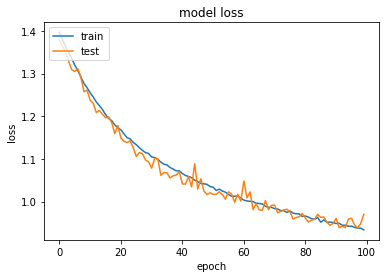

In [191]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


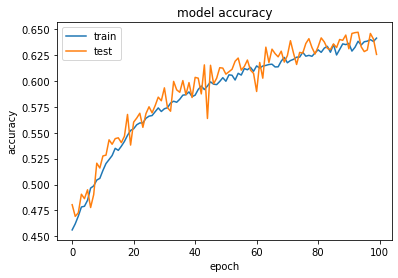

In [192]:
# summarize history for accuracy
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [116]:
 # evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 97.71%


In [118]:

preds = model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

5/5 [==============================] - 0s 2ms/step


In [119]:
preds

array([[0.00321173, 0.99678826],
       [0.0054967 , 0.9945034 ],
       [0.06032036, 0.93967956],
       [0.01000655, 0.9899934 ],
       [0.08117221, 0.9188278 ],
       [0.00488093, 0.9951191 ],
       [0.00754434, 0.9924556 ],
       [0.01404066, 0.98595935],
       [0.07896012, 0.9210398 ],
       [0.0123054 , 0.9876946 ],
       [0.0142125 , 0.9857875 ],
       [0.01581579, 0.98418415],
       [0.00845539, 0.9915446 ],
       [0.0241882 , 0.9758118 ],
       [0.08571474, 0.9142853 ],
       [0.08157583, 0.9184242 ],
       [0.0682727 , 0.9317273 ],
       [0.01047418, 0.9895258 ],
       [0.05002907, 0.9499709 ],
       [0.0216964 , 0.9783036 ],
       [0.02600059, 0.97399944],
       [0.00956935, 0.99043065],
       [0.09500514, 0.90499485],
       [0.06761278, 0.93238723],
       [0.04463308, 0.9553669 ],
       [0.00997374, 0.99002624],
       [0.0603652 , 0.93963474],
       [0.01303048, 0.9869695 ],
       [0.01292651, 0.9870734 ],
       [0.01510165, 0.9848984 ],
       [0.

In [120]:
preds1=preds.argmax(axis=1)

In [121]:
preds1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [122]:
abc = preds1.astype(int).flatten()

In [123]:
predictions = (lb.inverse_transform((abc)))

In [124]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,surprised
1,surprised
2,surprised
3,surprised
4,surprised
5,surprised
6,surprised
7,surprised
8,surprised
9,surprised


In [125]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [126]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,surprised
1,surprised
2,surprised
3,surprised
4,surprised
5,surprised
6,surprised
7,surprised
8,surprised
9,surprised


In [127]:
finaldf = actualdf.join(preddf)

In [129]:
finaldf

,actualvalues,predictedvalues
0,surprised,surprised
1,surprised,surprised
2,surprised,surprised
3,surprised,surprised
4,surprised,surprised
...,...,...
126,surprised,surprised
127,surprised,surprised
128,surprised,surprised
129,surprised,surprised


In [130]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
sample,3
surprised,128


In [132]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
surprised,131


In [99]:
x_traincnn

array([[[ 0.0400453 ],
        [ 0.01648435],
        [ 0.07306752],
        ...,
        [ 0.17381274],
        [ 0.05575436],
        [ 0.06204755]],

       [[ 0.04973472],
        [-0.02919139],
        [-0.0816758 ],
        ...,
        [ 0.29067992],
        [ 0.08790905],
        [ 0.09321983]],

       [[ 0.02491679],
        [ 0.06503957],
        [-0.07788611],
        ...,
        [ 0.21706219],
        [ 0.11884349],
        [ 0.06862724]],

       ...,

       [[-0.02093703],
        [ 0.00222785],
        [ 0.01733568],
        ...,
        [ 0.07330881],
        [ 0.02501503],
        [ 0.02768482]],

       [[ 0.02878515],
        [-0.00630185],
        [-0.05738398],
        ...,
        [ 0.18181534],
        [ 0.05000504],
        [ 0.07897803]],

       [[-0.00578663],
        [ 0.00438823],
        [-0.13300576],
        ...,
        [ 0.20662598],
        [ 0.06948617],
        [ 0.07441902]]])

### b. LSTM

In [182]:
model_lstm = Sequential()

model_lstm.add(LSTM(256, input_shape=(820,1)))
model_lstm.add(Activation('relu'))
#model_lstm.add(LSTM(128))
#model_lstm.add(Activation('relu'))
#model_lstm.add(Dropout(0.1))
#model_lstm.add(MaxPooling1D(pool_size=(8)))
#model_lstm.add(Conv1D(128, 5,padding='same',))
#model_lstm.add(Activation('relu'))
#model_lstm.add(Conv1D(128, 5,padding='same',))
#model_lstm.add(Activation('relu'))
model_lstm.add(Flatten())
model_lstm.add(Dense(7))
model_lstm.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.1, decay=1e-6)

In [187]:
model_b = Sequential()

model_b.add(LSTM(256, input_shape=(820,1)))
model_b.add(Dense(7))
model_b.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.1, decay=1e-6)

In [188]:
model_b.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 1799      
_________________________________________________________________
activation_49 (Activation)   (None, 7)                 0         
Total params: 265,991
Trainable params: 265,991
Non-trainable params: 0
_________________________________________________________________


In [189]:
model_b.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [190]:
cnnhistory_b=model_b.fit(x_traincnn, y_train, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
  7/639 [..............................] - ETA: 14:56 - loss: 10.6530 - accuracy: 0.1429

KeyboardInterrupt: 

In [184]:
model_lstm.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 256)               264192    
_________________________________________________________________
activation_47 (Activation)   (None, 256)               0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 1799      
_________________________________________________________________
activation_48 (Activation)   (None, 7)                 0         
Total params: 265,991
Trainable params: 265,991
Non-trainable params: 0
_________________________________________________________________


In [185]:
model_lstm.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [186]:
cnnhistory_lstm=model.fit(x_traincnn, y_train, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
639/639 [==============================] - 190s 297ms/step - loss: 0.9375 - accuracy: 0.6395 - val_loss: 0.9341 - val_accuracy: 0.6391
Epoch 2/100
639/639 [==============================] - 196s 307ms/step - loss: 0.9316 - accuracy: 0.6377 - val_loss: 0.9396 - val_accuracy: 0.6511
Epoch 3/100
639/639 [==============================] - 201s 315ms/step - loss: 0.9316 - accuracy: 0.6398 - val_loss: 0.9317 - val_accuracy: 0.6449
Epoch 4/100
639/639 [==============================] - 203s 317ms/step - loss: 0.9277 - accuracy: 0.6404 - val_loss: 0.9469 - val_accuracy: 0.6387
Epoch 5/100
639/639 [==============================] - 205s 322ms/step - loss: 0.9273 - accuracy: 0.6407 - val_loss: 0.9359 - val_accuracy: 0.6484
Epoch 6/100
639/639 [==============================] - 203s 318ms/step - loss: 0.9289 - accuracy: 0.6442 - val_loss: 0.9305 - val_accuracy: 0.6449
Epoch 7/100
639/639 [==============================] - 213s 334ms/step - loss: 0.9260 - accuracy: 0.6461 - val_loss: 0

KeyboardInterrupt: 

### Modelo CNN-LSTM

In [194]:
model_mix = Sequential()

model_mix.add(Conv1D(256, 5,padding='same', input_shape=(820,1)))
model_mix.add(Activation('relu'))
model_mix.add(Conv1D(128, 5,padding='same'))
model_mix.add(Activation('relu'))
model_mix.add(Dropout(0.1))
model_mix.add(MaxPooling1D(pool_size=(8)))
model_mix.add(Conv1D(128, 5,padding='same',))
model_mix.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model_mix.add(Conv1D(128, 5,padding='same',))
model_mix.add(Activation('relu'))
model_mix.add(LSTM(256))
model_mix.add(Flatten())
model_mix.add(Dense(7))
model_mix.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [195]:
model_mix.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_41 (Conv1D)           (None, 820, 256)          1536      
_________________________________________________________________
activation_55 (Activation)   (None, 820, 256)          0         
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 820, 128)          163968    
_________________________________________________________________
activation_56 (Activation)   (None, 820, 128)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 820, 128)          0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 102, 128)          0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 102, 128)        

In [196]:
model_mix.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [198]:
cnnhistory_mix=model_mix.fit(x_traincnn, y_train, batch_size=256, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
27/40 [===================>..........] - ETA: 1:09 - loss: 1.9441 - accuracy: 0.1746

KeyboardInterrupt: 

# LSTM model con 820 variables

In [199]:
model_lstm_820 = Sequential()
#este es el modelo que funcionó bien
model_lstm_820.add(LSTM(256, input_shape=(820,1)))
#model_b.add(LSTM(52))
model_lstm_820.add(Dropout(0.1))
#model_b.add(Activation('relu')) #
#model_b.add(Flatten()) #esto es importante para la prección del modelo
model_lstm_820.add(Dense(7))
model_lstm_820.add(Activation('softmax'))
opt = keras.optimizers.Adam(lr=0.0001, decay=1e-6)

In [200]:
model_lstm_820.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 256)               264192    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 1799      
_________________________________________________________________
activation_60 (Activation)   (None, 7)                 0         
Total params: 265,991
Trainable params: 265,991
Non-trainable params: 0
_________________________________________________________________


In [201]:
model_lstm_820.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [203]:
cnnhistorym_lstm_820=model_lstm_820.fit(x_traincnn, y_train, batch_size=256, epochs=150, validation_data=(x_testcnn, y_test))

Epoch 1/150
40/40 [==============================] - 436s 11s/step - loss: 1.9274 - accuracy: 0.1685 - val_loss: 1.9087 - val_accuracy: 0.1740
Epoch 2/150
40/40 [==============================] - 675s 17s/step - loss: 1.9000 - accuracy: 0.1734 - val_loss: 1.8973 - val_accuracy: 0.1740
Epoch 3/150
40/40 [==============================] - 930s 23s/step - loss: 1.8943 - accuracy: 0.1696 - val_loss: 1.8964 - val_accuracy: 0.1488
Epoch 4/150
11/40 [=======>......................] - ETA: 11:05 - loss: 1.9020 - accuracy: 0.1726

KeyboardInterrupt: 

## Matriz MLP Classifier

In [16]:
#event

In [17]:
#Model definition

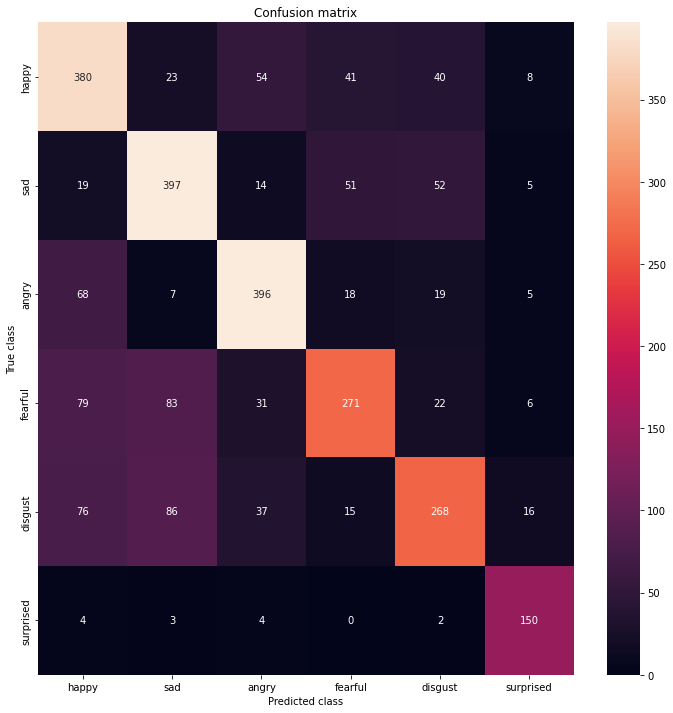

              precision    recall  f1-score   support

       angry       0.74      0.77      0.76       513
     disgust       0.67      0.54      0.59       498
     fearful       0.68      0.55      0.61       492
       happy       0.61      0.70      0.65       546
         sad       0.66      0.74      0.70       538
   surprised       0.79      0.92      0.85       163

    accuracy                           0.68      2750
   macro avg       0.69      0.70      0.69      2750
weighted avg       0.68      0.68      0.67      2750



In [19]:
#Sin neutral
mostrar_resultados(y_test, y_pred)

In [41]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 68.99%


In [14]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 68.83%


In [24]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 66.18%


In [41]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 65.83%


In [52]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 59.55%


In [67]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 62.07%


In [18]:
#confusion matrix
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y,labels=observed_emotions)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=observed_emotions, yticklabels=observed_emotions, annot=True, fmt="d");
    #sns.heatmap(conf_matrix);
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

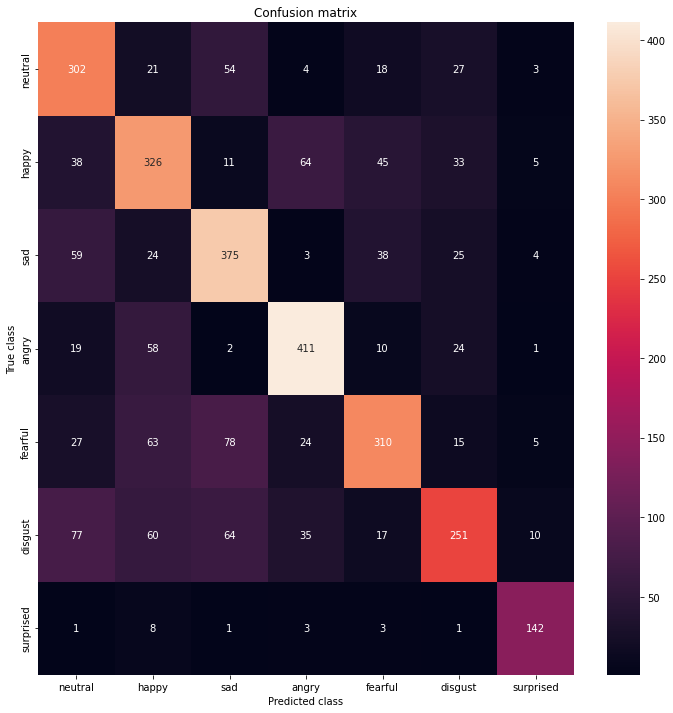

              precision    recall  f1-score   support

       angry       0.76      0.78      0.77       525
     disgust       0.67      0.49      0.56       514
     fearful       0.70      0.59      0.64       522
       happy       0.58      0.62      0.60       522
     neutral       0.58      0.70      0.63       429
         sad       0.64      0.71      0.67       528
   surprised       0.84      0.89      0.86       159

    accuracy                           0.66      3199
   macro avg       0.68      0.69      0.68      3199
weighted avg       0.67      0.66      0.66      3199



In [27]:
mostrar_resultados(y_test, y_pred)

In [70]:
modelOldParams = modelOldParams.fit(x_train, y_train)

In [71]:
#más base de datos
score_op = modelBestParams.score(x_train,y_train)
score_op

0.6846928499496475

In [25]:
score_op = modelBestParams.score(x_train,y_train)
score_op

0.8185513288170922

In [54]:
#700 iteraciones
score_op = modelBestParams.score(x_train,y_train)
score_op

0.8762897342365815

In [60]:
#700 iteraciones
score_op = modelBestParams.score(x_train,y_train)
score_op

0.8762897342365815

In [30]:
#700 iteraciones
score_op = modelBestParams.score(x_train,y_train)
score_op

0.8017717561229807

In [72]:
y_true, y_pred_op = y_test , modelOldParams.predict(x_test)

In [56]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred_op)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 68.15%


In [33]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred_op)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 65.65%


In [73]:
y_true, y_pred_op = y_test , modelOldParams.predict(x_test)
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred_op)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 60.10%


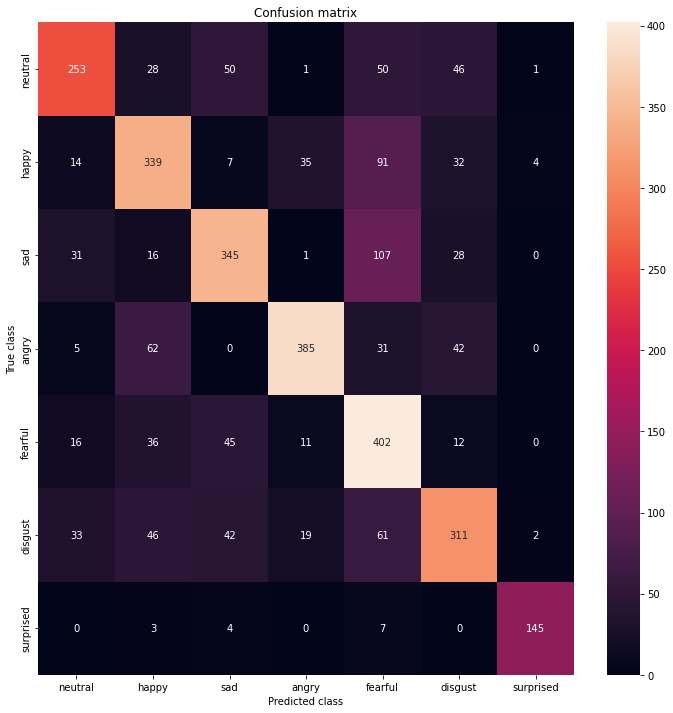

              precision    recall  f1-score   support

       angry       0.85      0.73      0.79       525
     disgust       0.66      0.61      0.63       514
     fearful       0.54      0.77      0.63       522
       happy       0.64      0.65      0.64       522
     neutral       0.72      0.59      0.65       429
         sad       0.70      0.65      0.68       528
   surprised       0.95      0.91      0.93       159

    accuracy                           0.68      3199
   macro avg       0.72      0.70      0.71      3199
weighted avg       0.70      0.68      0.68      3199



In [57]:
mostrar_resultados(y_test, y_pred_op)

In [ ]:
mostrar_resultados(y_test, y_pred_op)

In [ ]:
## Tecnica validación cruzada, para el overfitting

In [ ]:
#TODOOOO: ESTO DE ANTES ES ACCURACY, AHORA HABRÍA QUE CALCULAR EL UAR

## Instalaciones de la red Neuronal

In [1]:
conda update anaconda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\amand\anaconda3

  added / updated specs:
    - anaconda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py38haa95532_0         152 KB
    ipywidgets-7.6.5           |     pyhd3eb1b0_1         105 KB
    nltk-3.6.5                 |     pyhd3eb1b0_0         979 KB
    numpy-1.21.2               |   py38hfca59bb_0          24 KB
    numpy-base-1.21.2          |   py38h0829f74_0         4.4 MB
    ------------------------------------------------------------
                                           Total:         5.6 MB

The following packages will be UPDATED:

  certifi                          2021.5.30-py38haa95532_0 --> 2021.10.8-py38haa95532_0
  ipywidgets                             7.6.4-pyhd3eb1b0_0 --> 7.6.5-pyhd3eb1b0_1
  nltk                            

In [1]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.7.1
numpy: 1.21.2
matplotlib: 3.4.2
pandas: 1.3.3
statsmodels: 0.12.2
sklearn: 0.24.2


In [2]:
conda update scikit-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge tensorflow

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\amand\anaconda3

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |            eigen           4 KB
    absl-py-0.14.1             |     pyhd8ed1ab_0          98 KB  conda-forge
    astor-0.8.1                |     pyh9f0ad1d_0          25 KB  conda-forge
    astunparse-1.6.3           |     pyhd8ed1ab_0          15 KB  conda-forge
    blinker-1.4                |             py_1          13 KB  conda-forge
    cachetools-4.2.4           |     pyhd8ed1ab_0          12 KB  conda-forge
    certifi-2021.10.8    

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import SGD

# Modelo 1. Red Neuronal

# kNN Neighbours

In [172]:
#array = np.array(data)
from sklearn.neighbors import KNeighborsClassifier

result = []
xlabel = []
color = []
colors = ['red', 'green', 'blue']
index = 0

for random_seed in range(1,2):
    #features = array[:, 5:]
    #labels = data.ix[:, 'class'].dropna()
    #test_size = 0.30
    
    train_d, test_d, train_l, test_l = x_train, x_test, y_train, y_test

    for neighbors in range(1,10):
        kNN = KNeighborsClassifier(n_neighbors=neighbors)
        kNN.fit(train_d, train_l)
        prediction = kNN.predict(test_d)
        xlabel.append(neighbors)
        result.append(accuracy_score(prediction, test_l))
        color.append(colors[index])
        index = (index+1)%3

plt.figure(figsize=(10, 10))
plt.xlabel('kNN Neighbors for k=1,2...10')
plt.ylabel('Accuracy Score')
plt.title('kNN Classifier Results')
plt.ylim(0, 1)
plt.scatter(xlabel, result, color=color)
plt.savefig('10-folds kNN Result.png')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [455, 10220]

## LSTD

In [11]:
len(x_train)

12

In [233]:
conda install numpy=1.19

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\amand\anaconda3

  added / updated specs:
    - numpy=1.19


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    astropy-4.0.2              |   py38he774522_0         5.9 MB
    mkl-2020.2                 |              256       109.3 MB
    mkl-service-2.3.0          |   py38h196d8e1_0          47 KB
    mkl_fft-1.3.0              |   py38h46781fe_0         134 KB
    numexpr-2.7.3              |   py38hcbcaa1e_0         125 KB
    numpy-1.19.2               |   py38hadc3359_0          22 KB
    numpy-base-1.19.2          |   py38ha3acd2a_0         3.8 MB
    scipy-1.6.2                |   py38h14eb087_0        13.0 MB
    ------------------------------------------------------------
                 

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [9]:
from keras.layers.recurrent import LSTM

In [29]:
sequences = np.array(x_train)

# pad sequence
padded = pad_sequences(sequences)
X = np.expand_dims(padded, axis = 0)
print('Shape of X is ', X.shape) # (1, 3, 4)


Shape of X is  (1, 455, 12)


In [30]:
Y_train = np.array(y_train)
Y_train[Y_train == 'sample'] = float(1.0)  # equivalente a b.itemset((1, 1), -1)
Y_train[Y_train == 'surprised'] = float(2.0)

In [31]:
Y_train

array(['2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0',

In [32]:
Y_train = Y_train.astype('float64')

In [33]:
y = Y_train.reshape(1,-1)
print('Shape of y is', y.shape) # (1, 3)

Shape of y is (1, 455)


In [43]:
Y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
y

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 

In [39]:
model = Sequential()
model.add(LSTM(12, return_sequences=False, input_shape=(None, X.shape[2])))
#model.add(LSTM(12, return_sequences=False), input_shape=(None, 4))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile (
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.1))
model.summary()
model.fit(x = X, y = y, batch_size=32, epochs=2)
#x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 12)                1200      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 1,213
Trainable params: 1,213
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.1885
Epoch 2/2
1/1 [==============================] - 0s 998us/step - loss: 1.7658


In [41]:
sequences = np.array(x_test)

# pad sequence
padded = pad_sequences(sequences)
X_test = np.expand_dims(padded, axis = 0)
print('Shape of X is ', X_test.shape) # (1, 3, 4)


Shape of X is  (1, 152, 12)


In [42]:
Y_test = np.array(y_test)
Y_test[Y_test == 'sample'] = float(1.0)  # equivalente a b.itemset((1, 1), -1)
Y_test[Y_test == 'surprised'] = float(2.0)
Y_test = Y_test.astype('float64')

In [19]:
Y_test

array([1., 1., 1., 1.])

In [43]:
Y_test = Y_test.reshape(1,-1)
print('Shape of y is', Y_test.shape) # (1, 3)

Shape of y is (1, 152)


In [44]:
y_pred = model.predict(X_test)
#print("AUC score", roc_auc_score(test["Approves"], y_pred))

In [46]:
y_pred

array([[0.95059466]], dtype=float32)

In [48]:
from keras.utils import to_categorical
train_Y_one_hot = to_categorical(Y_train)
test_Y_one_hot = to_categorical(Y_test)

In [49]:
train_Y_one_hot

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [50]:
Y_train

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [51]:
print("AUC score", roc_auc_score(Y_test, y_pred))

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

# Pytorch

In [218]:
conda install -c pytorch pytorch

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\amand\anaconda3

  added / updated specs:
    - pytorch


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cudatoolkit-10.1.243       |       h74a9793_0       300.3 MB
    libuv-1.40.0               |       he774522_0         255 KB
    ninja-1.10.2               |       h6d14046_1         250 KB
    pytorch-1.8.1              |py3.8_cuda10.1_cudnn7_0       835.7 MB  pytorch
    ------------------------------------------------------------
                                           Total:        1.11 GB

The following NEW packages will be INSTALLED:

  cudatoolkit        pkgs/main/win-64::cudatoolkit-10.1.243-h74a9793_0
  libuv              pkgs/main/win-64::libuv-1.40.0-he774522_0
  ninja              pkgs/main/win-64::ninja-1.10.2

In [223]:
# torch
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.optim.lr_scheduler import ReduceLROnPlateau
# other
import pickle
import numpy as np
from sklearn.metrics import r2_score

## Con todas las variables

In [215]:
from keras.optimizers import RMSprop, Adam
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, LSTM, GRU, Bidirectional
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [225]:
model_cnn = Sequential()

model_cnn.add(Conv1D(256, 5,padding='same',
                 input_shape=(820,1)))
model_cnn.add(Activation('relu'))
model_cnn.add(Conv1D(128, 5,padding='same'))
model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(0.1))
model_cnn.add(MaxPooling1D(pool_size=(8)))
model_cnn.add(Conv1D(128, 5,padding='same',))
model_cnn.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model_cnn.add(Conv1D(128, 5,padding='same',))
model_cnn.add(Activation('relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(7))
model_cnn.add(Activation('softmax'))
opt = keras.optimizers.Adam(lr=0.00001, decay=1e-6)

In [216]:
model_bi2 = Sequential()

model_bi2.add(Conv1D(128, 5,padding='same', input_shape=(820,1)))
model_bi2.add(Activation('relu'))
model_bi2.add(Conv1D(256, 5,padding='same'))
model_bi2.add(Activation('relu'))
model_bi2.add(Dropout(0.1))
model_bi2.add(Conv1D(256, 5,padding='same',))
model_bi2.add(Activation('relu'))
model_bi2.add(MaxPooling1D(pool_size=(8)))

model_bi2.add(Bidirectional(LSTM(64, return_sequences=True)))
model_bi2.add(Bidirectional(LSTM(64)))
model_bi2.add(Activation('relu'))
model_bi2.add(Flatten())
model_bi2.add(Dense(7))
model_bi2.add(Activation('softmax'))

In [227]:
model_cnn.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [229]:
cnnhistory_cnn=model_cnn.fit(x_traincnn, y_train, batch_size=100, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
103/103 [==============================] - 175s 2s/step - loss: 1.8397 - accuracy: 0.2676 - val_loss: 1.7597 - val_accuracy: 0.3263
Epoch 2/100
103/103 [==============================] - 163s 2s/step - loss: 1.7271 - accuracy: 0.3280 - val_loss: 1.6874 - val_accuracy: 0.3531
Epoch 3/100
103/103 [==============================] - 173s 2s/step - loss: 1.6700 - accuracy: 0.3415 - val_loss: 1.6477 - val_accuracy: 0.3590
Epoch 4/100
103/103 [==============================] - 179s 2s/step - loss: 1.6378 - accuracy: 0.3531 - val_loss: 1.6202 - val_accuracy: 0.3656
Epoch 5/100
103/103 [==============================] - 177s 2s/step - loss: 1.6110 - accuracy: 0.3651 - val_loss: 1.5938 - val_accuracy: 0.3780
Epoch 6/100
103/103 [==============================] - 186s 2s/step - loss: 1.5943 - accuracy: 0.3687 - val_loss: 1.5816 - val_accuracy: 0.3664
Epoch 7/100
103/103 [==============================] - 189s 2s/step - loss: 1.5767 - accuracy: 0.3773 - val_loss: 1.5618 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
plt.plot(cnnhistory_bi2.history['loss'])
plt.plot(cnnhistory_bi2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()